# **Optical Conveyor Belt Transport Calculations for SrF molecules**

For Gen II SrF experiment, we will study cavity QED with molecules (e.g. cavity cooling and entanglement) in a science chamber that is separate from the MOT chamber.

To move SrF molecules from MOT chamber to science chamber, we would like to implement optical conveyor belt transport, similar to what was done for Rb and Cs atoms in the S. Cornish group at Durham University (see **A.J. Matthies et al, PRA (2024)** and **A.J. Matthies PhD Thesis, Durham University (2023)**).

# Summary of Main Results

Optical transport of SrF molecules from MOT chamber to science chamber using 2 static Gaussian beams offset in frequency using an AOM is possible.<br/>
**Calculations are performed using scalar polarizability of SrF, assuming small to negligible contribution from vector and tensor Stark shift.**<br/>
In fact, for **absolute ground state N=0, J=1/2, F=0, there is no vector or tensor Stark shift.**<br/>
Moreover, even though polar molecules have permanent dipole moment in molecule frame and allow E1 transition within single electronic level via microwaves, the transition frequency ($\sim$ GHz) is negligible compared to trapping light ($\sim$ 100s THz). <br/>
So we do not consider their contribution to Stark shift.

**Scalar polarizability of SrF in N=0 and N=1 states of $X^2\Sigma$ ($\lambda_0 = 663$ nm) at $\lambda = 1064$ nm is 240 a.u. (atomic units).** Vector contribution is $\sim$ 1-3 a.u. for non-F=0 states, and tensor contribution is $\sim$ 10-20 a.u. for non-F=0 states in N=1.

**The lowest temperature we can reach for SrF molecules via $\Lambda$-cooling is $\sim$ 10 $\mu$ K. Assuming we want trap depth to be $\sim$ 10x higher for efficient trapping, then we aim for optical trap depths $\sim$ 100 $\mu$ K during transport.** 

**At trap wavelength $\lambda = 1064$ nm (282 THz), we need $P \sim 100$ W** to replicate performance of transport scheme. <br/>
**At trap wavelength $\lambda = 685$ nm (438 THz), we need $P \sim 7$ W** to replicate performance of transport scheme. <br/>
**At trap wavelength $\lambda = 670$ nm (447.8 THz), we need $P \sim 2$ W** to replicate performance of transport scheme. <br/>
**At trap wavelength $\lambda = 664$ nm (451.8 THz), we need $P \sim 300$ mW** to replicate performance of transport scheme.

Preliminary estimates indicate that **even for close-detuned trap light, scattering rate does not exceed $\sim 1 \,\text{ms}^{-1}$**, which is an acceptable loss rate during transport.

# More Detailed Results

For trap wavelength **$\lambda = 664$ nm (451.8 THz), $P \sim 300$ mW** gives optimal results when **$w_0 = 147\,\mu$ m, $x_0 = 5.86$ cm (no maglev)** and **$w_0 = 171\,\mu$ m, $x_0 = 6.12$ cm (maglev)**.<br/>
The corresponding best minimum trap depth is: **88 $\mu$ K (no maglev)** and **99 $\mu$ K (maglev)**. **Axial acceleration** from best transport profiles (assuming maglev) reduces axial depth to **96 $\mu$ K for $v_\text{avg}$ up to 15 m/s**, and **86 $\mu$ K for $v_\text{avg}$ up to 25 m/s**.

For trap wavelength **$\lambda = 670$ nm (447.8 THz), $P \sim 2$ W** gives optimal results when **$w_0 = 145\,\mu$ m, $x_0 = 6.02$ cm (no maglev)** and **$w_0 = 169\,\mu$ m, $x_0 = 6.28$ cm (maglev)**.<br/>
The corresponding best minimum trap depth is: **83 $\mu$ K (no maglev)** and **95 $\mu$ K (maglev)**. **Axial acceleration** from best transport profiles (assuming maglev) reduces axial depth to **93 $\mu$ K for $v_\text{avg}$ up to 15 m/s**, and **83 $\mu$ K for $v_\text{avg}$ up to 25 m/s**.

For trap wavelength **$\lambda = 685$ nm (438 THz), $P \sim 7$ W** gives optimal results when **$w_0 = 149\,\mu$ m, $x_0 = 5.84$ cm (no maglev)** and **$w_0 = 176\,\mu$ m, $x_0 = 5.95$ cm (maglev)**.<br/>
The corresponding best minimum trap depth is: **97 $\mu$ K (no maglev)** and **107 $\mu$ K (maglev)**. **Axial acceleration** from best transport profiles (assuming maglev) reduces axial depth to **103 $\mu$ K for $v_\text{avg}$ up to 15 m/s**, and **92 $\mu$ K for $v_\text{avg}$ up to 25 m/s**.

For trap wavelength **$\lambda = 1064$ nm (282 THz), $P \sim 100$ W** gives optimal results when **$w_0 = 180\,\mu$ m, $x_0 = 6.14$ cm (no maglev)** and **$w_0 = 197\,\mu$ m, $x_0 = 7.17$ cm (maglev)**.<br/>
The corresponding best minimum trap depth is: **82 $\mu$ K (no maglev)** and **99 $\mu$ K (maglev)**. **Axial acceleration** from best transport profiles (assuming maglev) reduces axial depth to **93 $\mu$ K for $v_\text{avg}$ up to 15 m/s**, and **77 $\mu$ K for $v_\text{avg}$ up to 25 m/s**.

Higher wavelength trap light leads to reduced Rayleigh range, rendering maglev more effective for longer wavelength trap light. The same thing applies for axial trap tilt due to transport profile.

Any discrepancies in numerically computed optima are due to the resolution used in the heat maps. Higher resolution heat maps should converge to the correct optima, although it's likely that the optima are degenerate in the space $(w_0, x_0)$.

# Import Relevant Packages and Constants

In [1272]:
#import relevant Python packages, special functions, and constants
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0, mu_0, c, k, g, physical_constants
from scipy.special import ellipk, ellipe
from scipy.optimize import curve_fit

# Define Relevant Parameters for SrF Experiment.

Some quick back-of-envelope calculation. Scalar polarizability of SrF at 1064 nm is ~5 times worse than Cs (240 a.u vs 1162 a.u). So we need ~100 W of power at 1064 nm to achieve similar performance, e.g. minimum trap depths of 70 $\mu$ K along radial gravitational axis, 90 $\mu$ K along axial axis, and 125 $\mu$ K along radial non-gravitational axis.

SrF lowest temperature with $\Lambda$-cooling is roughly 10 $\mu$ K so we almost certainly need trap depths of 50-100 $\mu$ K for this to be viable.

1064 nm is 282 THz, 664 nm is 451.8 THz, and 663 nm is 452.5 THz. Polarizability scales roughly as 1/$\Delta$ (from 2nd order perturbation theory, it's actually 1/($\omega - \omega_0$) + 1/($\omega$ + $\omega_0$)), and so trap depth scales as $\sim P/\Delta$. So if we do 664 nm trap light, then the scalar polarizability increases by ~203x and so power decreases by that amount to maintain similar peformance. This corresponds to roughly 500 mW required. 

If we go to 670 nm (447.8 THz) so that a dichroic could (maybe) be doable, then scalar polarizability increases by ~29x, and so we need ~3 W. <br/>
Likewise, go to 685 nm (438 THz) which is our v=1 repumper wavelength, then scalar polarizability increases by ~10x, and so we need ~10 W.

However, we should point out that the minimum trap depth in this scheme is also dictated by the Rayleigh range $z_R$ of the trap light, which roughly gives a sense of the "spatial extent" of the highly intense light in the axial direction. $z_R$ is inversely proportional to wavelength $\lambda$, so we do get longer Rayleigh range at shorter wavelength which can help offset the (still) high power requirement at not-far-detuning trap wavelength. For same $w_0$, $z_R$ at 664 nm is 1.6x more than at 1064 nm, so power requirement is roughly 60% of before. Crudely, we estimate needing 300 mW of trap light power for this scheme.

Finally, even though scattering rate roughly scales like $\sim P/\Delta^2$, we did preliminary calculations to estimate that not-far-detuning will not be a huge concern for us, since it's on the order of 1 $\text{ms}^{-1}$.

In [1273]:
#define relevant parameters for SrF experiment.

#apparatus geometry values
L = 40e-2 #length of conveyor belt in m. Assume for our chamber the transport distance is roughly 40 cm.

#trap light parameters. For waist size and focus location, choose the optimum in absence of maglev.
lam = 664e-9 #wavelength of light in m
P = 0.3 #power of light in W
w0 = 147e-6 #optimum waist of light in m (no maglev)
x0 = 5.86e-2 #optimum focus position in m (no maglev)
w0mag = 171e-6 #optimum waist of light in m (maglev)
x0mag = 6.12e-2 #optimum focus position in m (maglev)
w0min = 100e-6 #minimum waist to explore in parameter search
w0max = 300e-6#maximum waist to explore in parameter search
x0min = 0 #minimum focus position to explore in parameter search
x0max = L/2 #maximum focus position to explore in parameter, because the geometry is symmetric

#physical constants
bohr_rad = physical_constants['Bohr radius'][0] #Bohr radius in m
amu = physical_constants['atomic mass constant'][0] #atomic mass unit in kg

#SrF molecule parameters
alpha_SrF = 240 * 203.24 * 4*np.pi*epsilon_0 * bohr_rad**3 #scalar polarizability of SrF at 664 nm, expressed as multiple of 1064 nm polarizability
#(here we will ignore vector and tensor AC stark shift at first)
m_SrF = 107 * amu #mass of SrF in kg. Sr-88 and F-19 isotopes.

#optimal parameter search params
num_grid_pts = 50 #number of grid points in heat map for calculating overall depth
num_grid_pts2 = 1000 #number of grid points in heat map for calculating axial depth

# Define Functions for Gaussian Laser Beam

In [1274]:
#define relevant functions for a Gaussian laser beam
#x is position along beam axis. w0 is beam waist. 
#x0 is focal point. lam is wavelength. P is power. 
#y and z are transverse coordinates.

def w(x,w0,x0,lam):
    xR = np.pi * w0**2 / lam
    return w0 * np.sqrt(1 + ((x-x0) / xR)**2)

def I0(P,x,w0,x0,lam):
    return 2 * P / (np.pi * w(x,w0,x0,lam)**2)

def gaussian_beam_intensity(x,x0,y,z,w0,lam,P):
    intensity = I0(P,x,w0,x0,lam) * np.exp(-2 * (y**2 + z**2) / w(x,w0,x0,lam)**2)
    return intensity

# Define Functions for Optical Conveyor Belt

Optical conveyor belt is formed by interfering counter-propagating Gaussian laser beams.<br/>
"No cosine" term is used when computing trap depth because by definition, trap depth is the "height" of the antinodes of the standing wave.

In [1275]:
#define relevant functions for optical conveyor belt using interfering counter-propagating Gaussian beams
def conveyor_intensity(x,x0,y,z,w0,lam,P):
    k = 2 * np.pi / lam
    I1 = gaussian_beam_intensity(x,x0,y,z,w0,lam,P)
    I2 = gaussian_beam_intensity(x,L-x0,y,z,w0,lam,P)
    total = I1 + I2 + 2 * np.sqrt(I1 * I2) * np.cos(2*k*x)
    return total

#no cos is used for calculating trap depth which occurs at max intensity (antinodes)
def conveyor_intensity_no_cos(x,x0,y,z,w0,lam,P):
    I1 = gaussian_beam_intensity(x,x0,y,z,w0,lam,P)
    I2 = gaussian_beam_intensity(x,L-x0,y,z,w0,lam,P)
    total = I1 + I2 + 2 * np.sqrt(I1 * I2)
    return total

# Example of Optical Conveyor Belt Axial Intensity Profile

Note that there are far more ripples than show because we are "aliasing" by sampling not that often compared to optical wavelength (1064 nm).<br/>

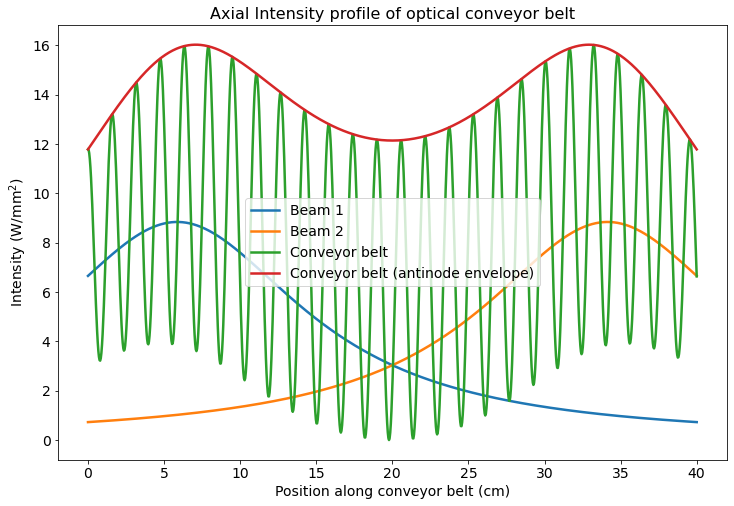

In [1276]:
#plot the conveyor belt intensity profile

plt.figure(figsize=(12, 8))  # Set the figure size
#along the beam axis
y = 0
z = 0
x = np.linspace(0,L,1000)
intensity = conveyor_intensity(x,x0,y,z,w0,lam,P)/1e6
intensity0 = conveyor_intensity_no_cos(x,x0,y,z,w0,lam,P)/1e6
intensity1 = gaussian_beam_intensity(x,x0,y,z,w0,lam,P)/1e6
intensity2 = gaussian_beam_intensity(x,L-x0,y,z,w0,lam,P)/1e6
plt.plot(x*1e2,intensity1,label='Beam 1', linewidth=2.5)
plt.plot(x*1e2,intensity2,label='Beam 2', linewidth=2.5)
plt.plot(x*1e2,intensity,label='Conveyor belt', linewidth=2.5)
plt.plot(x*1e2,intensity0,label='Conveyor belt (antinode envelope)', linewidth=2.5)
plt.xlabel('Position along conveyor belt (cm)', fontsize=14)
plt.ylabel('Intensity (W/mm$^2$)', fontsize=14)
plt.title('Axial Intensity profile of optical conveyor belt', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

# Example of Optical Conveyor Belt Radial Intensity Profile Including Gravity

Gravity tilts the trapping potential because it's a linear mgz term.

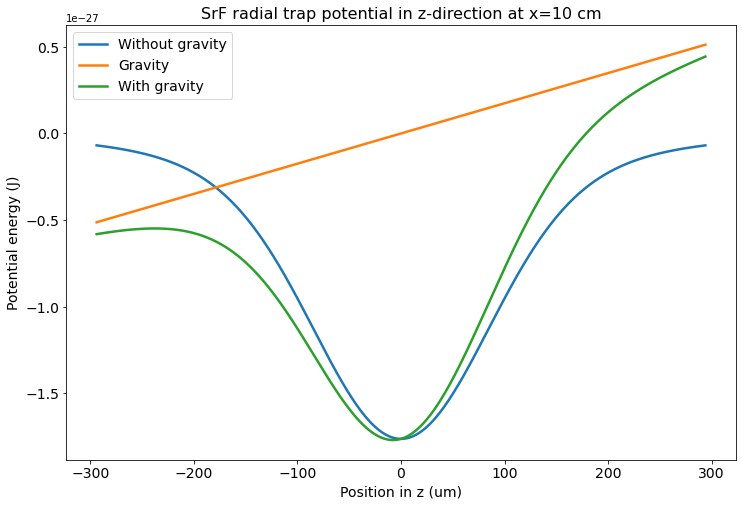

In [1277]:
#plot radial depth including gravity (z-direction)

#first, let's plot an example of what the trapping potential looks like as a function of z, for some fixed axial position x along the belt
x = 10e-2 #10 cm along the belt
y = 0 

#potential well for SrF in the z-direction without gravity
def U_radial_SrF_without_grav(z,x,x0,w0,lam,P):
    return -alpha_SrF/(2*epsilon_0*c) * conveyor_intensity(x,x0,y,z,w0,lam,P)

#ignore cosine interference term
def U_radial_SrF_without_grav_no_cos(z,x,x0,w0,lam,P):
    return -alpha_SrF/(2*epsilon_0*c) * conveyor_intensity_no_cos(x,x0,y,z,w0,lam,P)

#potential well for SrF in z-direction including gravity
def U_radial_SrF_with_grav(z,x,x0,w0,lam,P):
    return U_radial_SrF_without_grav(z,x,x0,w0,lam,P) + m_SrF * g * z

def U_radial_SrF_with_grav_no_cos(z,x,x0,w0,lam,P):
    return U_radial_SrF_without_grav_no_cos(z,x,x0,w0,lam,P) + m_SrF * g * z

z = np.linspace(-2*w0,2*w0,1000)
plt.figure(figsize=(12, 8))
plt.plot(z*1e6,U_radial_SrF_without_grav(z,x,x0,w0,lam,P), label='Without gravity', linewidth=2.5)
plt.plot(z*1e6, m_SrF * g * z, label='Gravity', linewidth=2.5)
plt.plot(z*1e6,U_radial_SrF_with_grav(z,x,x0,w0,lam,P), label='With gravity', linewidth=2.5)
plt.xlabel('Position in z (um)', fontsize=14)
plt.ylabel('Potential energy (J)', fontsize=14)
plt.title(f'SrF radial trap potential in z-direction at x={100*x:.0f} cm', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#extract difference between local max for z > 0 and local min
depth = (np.max(U_radial_SrF_with_grav(z,x,x0,w0,lam,P)[z<0]) - np.min(U_radial_SrF_with_grav(z,x,x0,w0,lam,P)))/k*1e6

# SrF Optical Transport Calculations

## Axial (x), Non-Gravity Radial (y), and Gravity Radial (z) Trap Depths along Transport Axis (x)

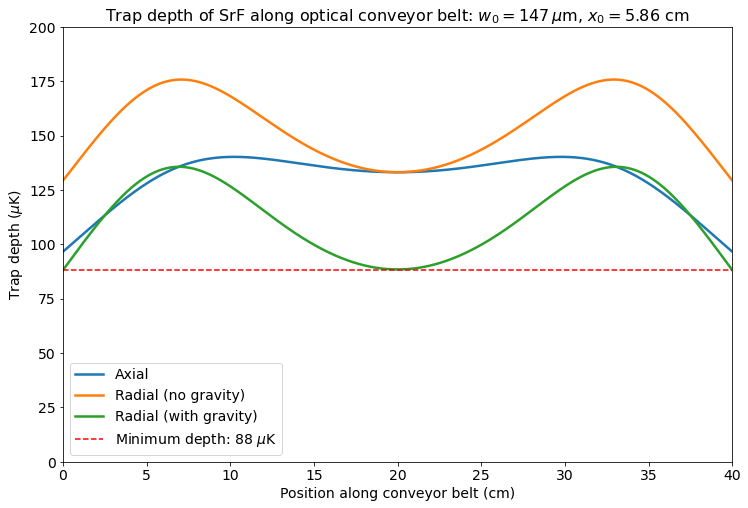

In [1278]:
#now calculate the radial trap depth including gravity along the optical conveyor belt axis

x = np.linspace(0,L,1000)
y = 0
z = np.linspace(-2*w0,2*w0,1000)
depths = np.empty(len(x))

#no cos because we only consider trapping at the antinodes of the standing wave
for i in range(len(x)):
    depths[i] = (np.max(U_radial_SrF_with_grav_no_cos(z,x[i],x0,w0,lam,P)[z<0]) - np.min(U_radial_SrF_with_grav_no_cos(z,x[i],x0,w0,lam,P)))/k*1e6

#plot radial and axial trap depths

#in hindsight I could probably also do this with no cos since we only care about the antinodes?
def U_axial_potential_SrF(x,x0,y,z,w0,lam,P):
    return -(alpha_SrF/(2*epsilon_0*c))*conveyor_intensity(x,x0,y,z,w0,lam,P)

#axial trap depth of SrF in uK (x-direction)
def U_axial_SrF(x,x0,w0,lam,P):
    peak_intensity1 = I0(P,x,w0,x0,lam)
    peak_intensity2 = I0(P,x,w0,L-x0,lam)
    return (2*alpha_SrF*np.sqrt(peak_intensity1*peak_intensity2)/(epsilon_0*c)/k)*1e6

#radial trap depth of SrF in uK without gravity (y-direction)
def U_radial_SrF(x,x0,w0,lam,P):
    peak_intensity1 = I0(P,x,w0,x0,lam)
    peak_intensity2 = I0(P,x,w0,L-x0,lam)
    return (alpha_SrF/(2*epsilon_0*c)) * (peak_intensity1 + peak_intensity2 + 2*np.sqrt(peak_intensity1*peak_intensity2))/k*1e6

min_axial = np.min(U_axial_SrF(x,x0,w0,lam,P))
min_radial = np.min(U_radial_SrF(x,x0,w0,lam,P))
min_radial_grav = np.min(depths)
overall_min = min(min_axial, min_radial, min_radial_grav)

plt.figure(figsize=(12, 8))
plt.plot(x*1e2,U_axial_SrF(x,x0,w0,lam,P), label='Axial', linewidth=2.5)
plt.plot(x*1e2,U_radial_SrF(x,x0,w0,lam,P), label='Radial (no gravity)', linewidth=2.5)
plt.plot(x*1e2,depths, label='Radial (with gravity)', linewidth=2.5)
plt.axhline(y=overall_min, color='red', linestyle='--', label=f'Minimum depth: {round(overall_min)} $\mu$K')
plt.xlabel('Position along conveyor belt (cm)', fontsize=14)
plt.ylabel('Trap depth ($\mu$K)', fontsize=14)
plt.title(f'Trap depth of SrF along optical conveyor belt: $w_0 = {w0*1e6:.0f}\, \mu$m, $x_0 = {x0*1e2:.2f}$ cm', fontsize=16)
plt.ylim(0, 200)
plt.xlim(0, L*1e2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

# Optimize for beam waist ($w_0$) and focus ($x_0$) positions for no magnetic levitation
## Compute minimum SrF trap depth (among axial and radial) along transport path.

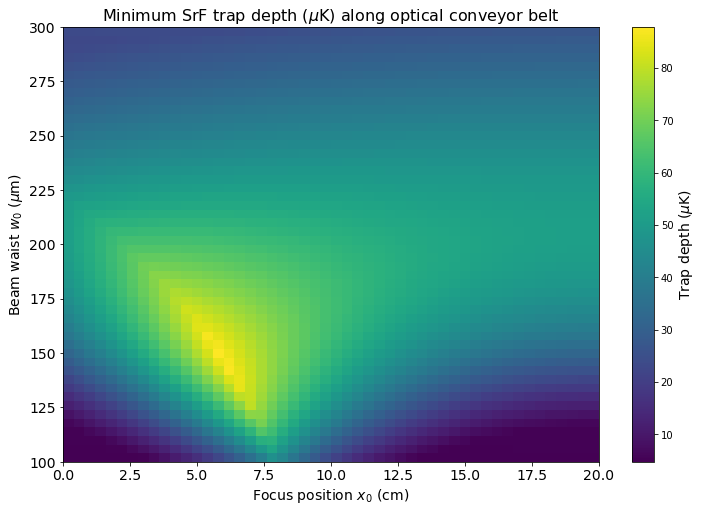

Optimum temperature: 88 µK
Optima coordinates: (w₀ = 149.0 µm, x₀ = 5.71 cm)


In [1279]:
#for a range of beam waists and focus positions, compute the minimum trap depth (among radial and axial)
#along the optical conveyor belt path

x0s = np.linspace(x0min, x0max, num_grid_pts) #in m
w0s = np.linspace(w0min, w0max, num_grid_pts) #in m
overall_mins = np.empty((len(x0s), len(w0s)))

for i in range(len(x0s)):
    for j in range(len(w0s)):
        x = np.linspace(0,L,1000)
        y = 0
        z = np.linspace(-2*w0s[j],2*w0s[j],1000)
        depths = np.empty(len(x))

        #no cos because we only consider trapping at the antinodes of the standing wave
        for index in range(len(x)):
            depths[index] = (np.max(U_radial_SrF_with_grav_no_cos(z,x[index],x0s[i],w0s[j],lam,P)[z<0]) - np.min(U_radial_SrF_with_grav_no_cos(z,x[index],x0s[i],w0s[j],lam,P)))/k*1e6

        min_axial = np.min(U_axial_SrF(x,x0s[i],w0s[j],lam,P))
        min_radial = np.min(U_radial_SrF(x,x0s[i],w0s[j],lam,P))
        min_radial_grav = np.min(depths)
        overall_min = min(min_axial, min_radial, min_radial_grav)
        overall_mins[i][j] = overall_min
        #print(overall_mins[i][j], i, j, x0s[i], w0s[j])

overall_mins_final = np.transpose(overall_mins) #rows and cols in 2d matrix plot are flipped
plt.figure(figsize=(12, 8))
plt.imshow(overall_mins_final, extent=[x0min*1e2, x0max*1e2, w0min*1e6, w0max*1e6], origin='lower', aspect='auto')
plt.colorbar().set_label('Trap depth ($\mu$K)', fontsize=14)
plt.xlabel('Focus position $x_0$ (cm)', fontsize=14)
plt.ylabel('Beam waist $w_0$ ($\mu$m)', fontsize=14)
plt.title('Minimum SrF trap depth ($\mu$K) along optical conveyor belt', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

max_value = np.max(overall_mins_final)
max_coords = np.unravel_index(np.argmax(overall_mins_final), overall_mins_final.shape)
optimal_x0 = x0s[max_coords[1]] * 1e2  # Convert to cm
optimal_w0 = w0s[max_coords[0]] * 1e6  # Convert to µm
print(f'Optimum temperature: {max_value:.0f} µK')
print(f'Optima coordinates: (w\u2080 = {optimal_w0:.1f} µm, x\u2080 = {optimal_x0:.2f} cm)')

# Account for Magnetic Levitation

Note that magnetic levitation (maglev) to cancel gravitational tilt is useful, but may be annoying to implement for SrF as we typically want to be in a magnetically-insensitive state (e.g. absolute ground state N=0, J=1/2, F=0) for our science experiments. Nonetheless, let's estimate how it would help here, if we assume we trap in the same state used for SrF magnetic trapping.

## Define radial (Br) and axial (Bz) fields for current loop (cylindrical coordinates)

In [1280]:
#account for magnetic levitation at beginning and end of conveyor belt
#magnetic levitation is achieved by using a B-field gradient to cancel the force of gravity at the beginning and end of the conveyor belt (in the MOT and science cell regions)
#first let's calculate some parameters related to the magnetic forces

#using Biot-Savart law and working in cylindrical coordinates, we compute Br and Bz (radial and axial components of B-field) for a current loop
#note here that r is radial in the coils, i.e. one of the directions is the transport axis

#r is radial distance from center of current loop. R is radius of current loop. 
#s is the separation between the two current loops. z is axial distance from center of current loop. I is current in the loop
def Br(r,R,s,z,I):
    prefactor = mu_0 * I / (2 * np.pi)
    z_tilde = z-s/2
    kappa = 4*R*r/((R+r)**2+(z_tilde)**2)
    K = ellipk(kappa)
    E = ellipe(kappa)
    field = prefactor * (z_tilde/(r*np.sqrt((R+r)**2 + z_tilde**2)))*((R**2+r**2+z_tilde**2)/((R-r)**2+z_tilde**2)*E - K)
    return field

def Bz(r,R,s,z,I):
    prefactor = mu_0 * I / (2 * np.pi)
    z_tilde = z-s/2
    kappa = 4*R*r/((R+r)**2+(z_tilde)**2)
    K = ellipk(kappa)
    E = ellipe(kappa)
    field = prefactor * (1/np.sqrt((R+r)**2 + z_tilde**2)) * ((R**2-r**2-z_tilde**2)/((R-r)**2+z_tilde**2)*E + K)
    return field

# Bias and Quadrupole Coil Parameters for MOT Chamber (MC) and Science Cell (SC)

Here, we take the measurements of the RbCs apparatus as a reasonable reference. This can be modified once we have better sense of SrF apparatus geometry.

In [1281]:
#parameters for MOT chamber and science chamber coil radius, separation, and number of turns

RBias_MC = 6.6e-2 #radius of bias MOT chamber coil in m
RBias_SC = 5.156e-2 #radius of bias science chamber coil in m
RQuad_MC = 4.0e-2 #radius of quadrupole MOT chamber coil in m
RQuad_SC = 3.917e-2 #radius of quadrupole science chamber coil in m


sBias_MC = 6.83e-2 #separation of bias MOT chamber coils in m
sBias_SC = 5.88e-2 #separation of bias science chamber coils in m
sQuad_MC = 6.89e-2 #separation of quadrupole MOT chamber coils in m
sQuad_SC = 5.2e-2 #separation of quadrupole science chamber coils in m

NBias_MC = 8 #number of turns in bias MOT chamber coil
NBias_SC = 12 #number of turns in bias science chamber coil
NQuad_MC = 6 #number of turns in quadrupole MOT chamber coil
NQuad_SC = 6 #number of turns in quadrupole science chamber coil

# Compute Current in MC and SC Coils needed for Levitation and DC Bias

18.8 G/cm levitates SrF in its magnetic trapping state N=1, J=3/2, F=1, mF=1.<br/>
6 G bias field pushes B-field zero below z = 0, which is needed for high-field seeking states. It also provides non-zero quantization axis throughout transport.

Note that the magnetic trapping state may not be the one we want for science experiments; in fact, for N=0 molecules, we actually may want to put molecules in a mF=0 sublevel, which would be magnetically insensitive. But let's just pursue this for sake of argument for now.

We find we need **I_bias_MC = 5.6 A, I_bias_SC = 3.1 A, I_quad_MC = 61.7 A, I_quad_SC = 47.8 A.**

In [1282]:
#compute the current used in the coils before computing B-field along transport axis. We need 6 G offset at MOT and SC chamber center. 18.8 G/cm gradient at same.
#this could probably be done in Mathematica if I solve the equations but I'm just going to be lazy and brute force it in Python

#first for the bias field. z = 0 and r = 0. Helmholtz configuration (current in same direction in both loops.)
IBias_MC = 5.6226 #current in A
BzBias_MC = (Bz(0,RBias_MC,sBias_MC,0,NBias_MC*IBias_MC) + Bz(0,RBias_MC,-sBias_MC,0,NBias_MC*IBias_MC))*1e4 #in Gauss
print("MOT chamber Bias field in Gauss:", BzBias_MC)

IBias_SC = 3.1295 #current in A
BzBias_SC = (Bz(0,RBias_SC,sBias_SC,0,NBias_SC*IBias_SC) + Bz(0,RBias_SC,-sBias_SC,0,NBias_SC*IBias_SC))*1e4 #in Gauss
print("Science chamber Bias field in Gauss:", BzBias_SC)

#next for the quadrupole field. z = 0 and r = 0.
IQuad_MC = 61.741 #current in A
BzQuad_MC = (Bz(0e-2,RQuad_MC,sQuad_MC,0.001e-2,NQuad_MC*IQuad_MC) + Bz(0e-2,RQuad_MC,-sQuad_MC,0.001e-2,-NQuad_MC*IQuad_MC))*1e4 #in Gauss
BrQuad_MC = (Br(0.001e-2,RQuad_MC,sQuad_MC,0e-2,NQuad_MC*IQuad_MC) + Br(0.001e-2,RQuad_MC,-sQuad_MC,0e-2,-NQuad_MC*IQuad_MC))*1e4 #in Gauss
print("MOT chamber quadrupole field gradient (axial) in Gauss/cm:", BzQuad_MC/0.001)
print("MOT chamber quadrupole field gradient (radial) in Gauss/cm:", BrQuad_MC/0.001)

IQuad_SC = 47.7924 #current in A
BzQuad_SC = (Bz(0,RQuad_SC,sQuad_SC,0.001e-2,NQuad_SC*IQuad_SC) + Bz(0,RQuad_SC,-sQuad_SC,0.001e-2,-NQuad_SC*IQuad_SC))*1e4 #in Gauss
BrQuad_SC = (Br(0.001e-2,RQuad_SC,sQuad_SC,0e-2,NQuad_SC*IQuad_SC) + Br(0.001e-2,RQuad_SC,-sQuad_SC,0e-2,-NQuad_SC*IQuad_SC))*1e4 #in Gauss
print("Science chamber quadrupole field gradient (axial) in Gauss/cm:", BzQuad_SC/0.001)
print("Science chamber quadrupole field gradient (radial) in Gauss/cm:", BrQuad_SC/0.001)
print("As expected, radial gradient is -0.5*axial gradient to satisfy div B = 0 in free space.")

MOT chamber Bias field in Gauss: 6.0000388010366335
Science chamber Bias field in Gauss: 6.000135879391095
MOT chamber quadrupole field gradient (axial) in Gauss/cm: 18.77585655697938
MOT chamber quadrupole field gradient (radial) in Gauss/cm: -9.387928311547078
Science chamber quadrupole field gradient (axial) in Gauss/cm: 18.775827205401786
Science chamber quadrupole field gradient (radial) in Gauss/cm: -9.387914175800292
As expected, radial gradient is -0.5*axial gradient to satisfy div B = 0 in free space.


# Compute |B| along transport axis (x, y=0, z=0)

We find |B| is always non-zero, providing a quantization axis for molecules throughout transport.<br/>
Gradients of |B| with respect to x, y, and z provide magnetic levitation/trapping (or anti-trapping) forces for molecules during transport.<br/>

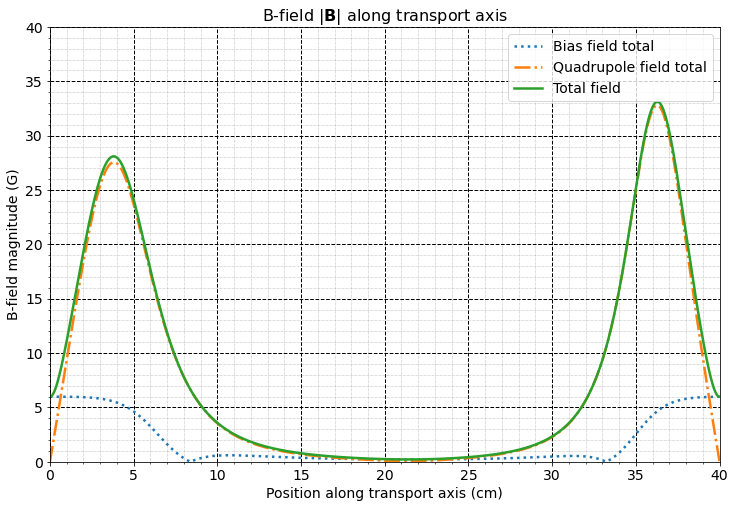

In [1283]:
#compute magnitude of B-field along transport axis, replicating Fig. 2.10 in A. Matthies thesis

#in our common coordinate system, place MOT chamber at x,y,z = 0,0,0. Then science chamber is at x,y,z = L,0,0. Work in cylindrical coordinates. 
#On transport axis, only vary x (aka r) while y,z=0,0. 

x = np.linspace(0,L,1000)
BzsBias_MC = np.empty(len(x))
BrsBias_MC = np.empty(len(x))
BzsQuad_MC = np.empty(len(x))
BrsQuad_MC = np.empty(len(x))

BzsBias_SC = np.empty(len(x))
BrsBias_SC = np.empty(len(x))
BzsQuad_SC = np.empty(len(x))
BrsQuad_SC = np.empty(len(x))

for i in range(len(x)):
    if x[i] == 0 or x[i] == L:
        BrsBias_MC[i] = 0
        BrsQuad_MC[i] = 0
        BrsBias_SC[i] = 0
        BrsQuad_SC[i] = 0
        BzsBias_MC[i] = (Bz(x[i],RBias_MC,sBias_MC,0,NBias_MC*IBias_MC) + Bz(x[i],RBias_MC,-sBias_MC,0,NBias_MC*IBias_MC))*1e4 #in Gauss
        BzsQuad_MC[i] = (Bz(x[i],RQuad_MC,sQuad_MC,0,NQuad_MC*IQuad_MC) + Bz(x[i],RQuad_MC,-sQuad_MC,0,-NQuad_MC*IQuad_MC))*1e4 #in Gauss
        BzsBias_SC[i] = (Bz(L-x[i],RBias_SC,sBias_SC,0,NBias_SC*IBias_SC) + Bz(L-x[i],RBias_SC,-sBias_SC,0,NBias_SC*IBias_SC))*1e4 #in Gauss
        BzsQuad_SC[i] = (Bz(L-x[i],RQuad_SC,sQuad_SC,0,NQuad_SC*IQuad_SC) + Bz(L-x[i],RQuad_SC,-sQuad_SC,0,-NQuad_SC*IQuad_SC))*1e4 #in Gauss
        continue

    BzsBias_MC[i] = (Bz(x[i],RBias_MC,sBias_MC,0,NBias_MC*IBias_MC) + Bz(x[i],RBias_MC,-sBias_MC,0,NBias_MC*IBias_MC))*1e4 #in Gauss
    BrsBias_MC[i] = (Br(x[i],RBias_MC,sBias_MC,0,NBias_MC*IBias_MC) + Br(x[i],RBias_MC,-sBias_MC,0,NBias_MC*IBias_MC))*1e4 #in Gauss
    BzsQuad_MC[i] = (Bz(x[i],RQuad_MC,sQuad_MC,0,NQuad_MC*IQuad_MC) + Bz(x[i],RQuad_MC,-sQuad_MC,0,-NQuad_MC*IQuad_MC))*1e4 #in Gauss
    BrsQuad_MC[i] = (Br(x[i],RQuad_MC,sQuad_MC,0,NQuad_MC*IQuad_MC) + Br(x[i],RQuad_MC,-sQuad_MC,0,-NQuad_MC*IQuad_MC))*1e4 #in Gauss

    BzsBias_SC[i] = (Bz(L-x[i],RBias_SC,sBias_SC,0,NBias_SC*IBias_SC) + Bz(L-x[i],RBias_SC,-sBias_SC,0,NBias_SC*IBias_SC))*1e4 #in Gauss
    BrsBias_SC[i] = (-Br(L-x[i],RBias_SC,sBias_SC,0,NBias_SC*IBias_SC) - Br(L-x[i],RBias_SC,-sBias_SC,0,NBias_SC*IBias_SC))*1e4 #in Gauss
    BzsQuad_SC[i] = (Bz(L-x[i],RQuad_SC,sQuad_SC,0,NQuad_SC*IQuad_SC) + Bz(L-x[i],RQuad_SC,-sQuad_SC,0,-NQuad_SC*IQuad_SC))*1e4 #in Gauss
    BrsQuad_SC[i] = (-Br(L-x[i],RQuad_SC,sQuad_SC,0,NQuad_SC*IQuad_SC) - Br(L-x[i],RQuad_SC,-sQuad_SC,0,-NQuad_SC*IQuad_SC))*1e4 #in Gauss


BBias_MC = np.sqrt(BzsBias_MC**2 + BrsBias_MC**2)
BQuad_MC = np.sqrt(BzsQuad_MC**2 + BrsQuad_MC**2)
BBias_SC = np.sqrt(BzsBias_SC**2 + BrsBias_SC**2)
BQuad_SC = np.sqrt(BzsQuad_SC**2 + BrsQuad_SC**2)

BBias_Total = np.sqrt((BzsBias_MC + BzsBias_SC)**2 + (BrsBias_MC + BrsBias_SC)**2)
BQuad_Total = np.sqrt((BzsQuad_MC + BzsQuad_SC)**2 + (BrsQuad_MC + BrsQuad_SC)**2)
BTotal = np.sqrt((BzsBias_MC + BzsBias_SC + BzsQuad_MC + BzsQuad_SC)**2 + (BrsBias_MC + BrsBias_SC + BrsQuad_MC + BrsQuad_SC)**2)


plt.figure(figsize=(12, 8))
plt.plot(x*1e2, BBias_Total, label='Bias field total', ls=':', linewidth=2.5)
plt.plot(x*1e2, BQuad_Total, label='Quadrupole field total', ls='-.', linewidth=2.5)
plt.plot(x*1e2, BTotal, label='Total field', linewidth=2.5)
plt.xlabel('Position along transport axis (cm)', fontsize=14)
plt.ylabel('B-field magnitude (G)', fontsize=14)
plt.xlim(0, L*1e2)
plt.ylim(0, 40)
plt.title('B-field $|\mathbf{B}|$ along transport axis', fontsize=16)
plt.legend(fontsize=14)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Compute magnetic levitation of SrF molecules along transport axis due to vertical (z) gradient in |B|

Vertical gradient d|B|/dz creates magnetic levitation (**maglev**) for the molecules. <br/>
Compute change in |B| from z=0 cm to z=0.01 cm along transport axis. Hold y=0. <br/>
Associated maglev force can cancel out trap tilting from gravity (shown as effective gravity).<br/>
Also, **ignore magnetic field gradient contribution to trap depth in x and y-directions** because it's negligible.

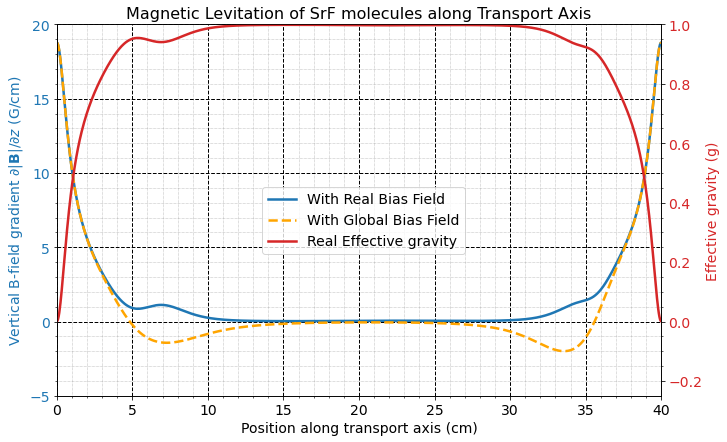

In [1284]:
#compute the vertical component of B-field gradient along transport axis and effective gravitational acceleration experienced by the molecules.
#note that we care about gradient in |B| along z-axis, and want to see how this changes across the transport axis.
#so we will compute |B| at z = 0 and z = 0.001 cm, and then compute the gradient in |B| along z-axis. And then do this across the transport axis.

x = np.linspace(0,L,1000)

#point 1 is on-axis (z=0) and point 2 is off-axis (z=0.001 cm)
BzsBias_MC1 = np.empty(len(x))
BzsBias_MC2 = np.empty(len(x))
BzsQuad_MC1 = np.empty(len(x))
BzsQuad_MC2 = np.empty(len(x))
BrsBias_MC1 = np.empty(len(x))
BrsBias_MC2 = np.empty(len(x))
BrsQuad_MC1 = np.empty(len(x))
BrsQuad_MC2 = np.empty(len(x))

BzsBias_SC1 = np.empty(len(x))
BzsBias_SC2 = np.empty(len(x))
BzsQuad_SC1 = np.empty(len(x))
BzsQuad_SC2 = np.empty(len(x))
BrsBias_SC1 = np.empty(len(x))
BrsBias_SC2 = np.empty(len(x))
BrsQuad_SC1 = np.empty(len(x))
BrsQuad_SC2 = np.empty(len(x))

for i in range(len(x)):
    z1 = 0e-2
    z2 = 0.01e-2
    if x[i] == 0 or x[i] == L:
        BrsBias_MC1[i] = 0
        BrsQuad_MC1[i] = 0
        BrsBias_SC1[i] = 0
        BrsQuad_SC1[i] = 0
        BrsBias_MC2[i] = 0
        BrsQuad_MC2[i] = 0
        BrsBias_SC2[i] = 0
        BrsQuad_SC2[i] = 0
        BzsBias_MC1[i] = (Bz(x[i],RBias_MC,sBias_MC,z1,NBias_MC*IBias_MC) + Bz(x[i],RBias_MC,-sBias_MC,z1,NBias_MC*IBias_MC))*1e4 #in Gauss
        BzsQuad_MC1[i] = (Bz(x[i],RQuad_MC,sQuad_MC,z1,NQuad_MC*IQuad_MC) + Bz(x[i],RQuad_MC,-sQuad_MC,z1,-NQuad_MC*IQuad_MC))*1e4 #in Gauss
        BzsBias_SC1[i] = (Bz(L-x[i],RBias_SC,sBias_SC,z1,NBias_SC*IBias_SC) + Bz(L-x[i],RBias_SC,-sBias_SC,z1,NBias_SC*IBias_SC))*1e4 #in Gauss
        BzsQuad_SC1[i] = (Bz(L-x[i],RQuad_SC,sQuad_SC,z1,NQuad_SC*IQuad_SC) + Bz(L-x[i],RQuad_SC,-sQuad_SC,z1,-NQuad_SC*IQuad_SC))*1e4 #in Gauss
        BzsBias_MC2[i] = (Bz(x[i],RBias_MC,sBias_MC,z2,NBias_MC*IBias_MC) + Bz(x[i],RBias_MC,-sBias_MC,z2,NBias_MC*IBias_MC))*1e4 #in Gauss
        BzsQuad_MC2[i] = (Bz(x[i],RQuad_MC,sQuad_MC,z2,NQuad_MC*IQuad_MC) + Bz(x[i],RQuad_MC,-sQuad_MC,z2,-NQuad_MC*IQuad_MC))*1e4 #in Gauss
        BzsBias_SC2[i] = (Bz(L-x[i],RBias_SC,sBias_SC,z2,NBias_SC*IBias_SC) + Bz(L-x[i],RBias_SC,-sBias_SC,z2,NBias_SC*IBias_SC))*1e4 #in Gauss
        BzsQuad_SC2[i] = (Bz(L-x[i],RQuad_SC,sQuad_SC,z2,NQuad_SC*IQuad_SC) + Bz(L-x[i],RQuad_SC,-sQuad_SC,z2,-NQuad_SC*IQuad_SC))*1e4 #in Gauss
        continue

    BzsBias_MC1[i] = (Bz(x[i],RBias_MC,sBias_MC,z1,NBias_MC*IBias_MC) + Bz(x[i],RBias_MC,-sBias_MC,z1,NBias_MC*IBias_MC))*1e4 #in Gauss
    BzsQuad_MC1[i] = (Bz(x[i],RQuad_MC,sQuad_MC,z1,NQuad_MC*IQuad_MC) + Bz(x[i],RQuad_MC,-sQuad_MC,z1,-NQuad_MC*IQuad_MC))*1e4 #in Gauss
    BzsBias_SC1[i] = (Bz(L-x[i],RBias_SC,sBias_SC,z1,NBias_SC*IBias_SC) + Bz(L-x[i],RBias_SC,-sBias_SC,z1,NBias_SC*IBias_SC))*1e4 #in Gauss
    BzsQuad_SC1[i] = (Bz(L-x[i],RQuad_SC,sQuad_SC,z1,NQuad_SC*IQuad_SC) + Bz(L-x[i],RQuad_SC,-sQuad_SC,z1,-NQuad_SC*IQuad_SC))*1e4 #in Gauss
    BrsBias_MC1[i] = (Br(x[i],RBias_MC,sBias_MC,z1,NBias_MC*IBias_MC) + Br(x[i],RBias_MC,-sBias_MC,z1,NBias_MC*IBias_MC))*1e4 #in Gauss
    BrsQuad_MC1[i] = (Br(x[i],RQuad_MC,sQuad_MC,z1,NQuad_MC*IQuad_MC) + Br(x[i],RQuad_MC,-sQuad_MC,z1,-NQuad_MC*IQuad_MC))*1e4 #in Gauss
    BrsBias_SC1[i] = (-Br(L-x[i],RBias_SC,sBias_SC,z1,NBias_SC*IBias_SC) - Br(L-x[i],RBias_SC,-sBias_SC,z1,NBias_SC*IBias_SC))*1e4 #in Gauss
    BrsQuad_SC1[i] = (-Br(L-x[i],RQuad_SC,sQuad_SC,z1,NQuad_SC*IQuad_SC) - Br(L-x[i],RQuad_SC,-sQuad_SC,z1,-NQuad_SC*IQuad_SC))*1e4 #in Gauss
    BzsBias_MC2[i] = (Bz(x[i],RBias_MC,sBias_MC,z2,NBias_MC*IBias_MC) + Bz(x[i],RBias_MC,-sBias_MC,z2,NBias_MC*IBias_MC))*1e4 #in Gauss
    BzsQuad_MC2[i] = (Bz(x[i],RQuad_MC,sQuad_MC,z2,NQuad_MC*IQuad_MC) + Bz(x[i],RQuad_MC,-sQuad_MC,z2,-NQuad_MC*IQuad_MC))*1e4 #in Gauss
    BzsBias_SC2[i] = (Bz(L-x[i],RBias_SC,sBias_SC,z2,NBias_SC*IBias_SC) + Bz(L-x[i],RBias_SC,-sBias_SC,z2,NBias_SC*IBias_SC))*1e4 #in Gauss
    BzsQuad_SC2[i] = (Bz(L-x[i],RQuad_SC,sQuad_SC,z2,NQuad_SC*IQuad_SC) + Bz(L-x[i],RQuad_SC,-sQuad_SC,z2,-NQuad_SC*IQuad_SC))*1e4 #in Gauss
    BrsBias_MC2[i] = (Br(x[i],RBias_MC,sBias_MC,z2,NBias_MC*IBias_MC) + Br(x[i],RBias_MC,-sBias_MC,z2,NBias_MC*IBias_MC))*1e4 #in Gauss
    BrsQuad_MC2[i] = (Br(x[i],RQuad_MC,sQuad_MC,z2,NQuad_MC*IQuad_MC) + Br(x[i],RQuad_MC,-sQuad_MC,z2,-NQuad_MC*IQuad_MC))*1e4 #in Gauss
    BrsBias_SC2[i] = (-Br(L-x[i],RBias_SC,sBias_SC,z2,NBias_SC*IBias_SC) - Br(L-x[i],RBias_SC,-sBias_SC,z2,NBias_SC*IBias_SC))*1e4 #in Gauss
    BrsQuad_SC2[i] = (-Br(L-x[i],RQuad_SC,sQuad_SC,z2,NQuad_SC*IQuad_SC) - Br(L-x[i],RQuad_SC,-sQuad_SC,z2,-NQuad_SC*IQuad_SC))*1e4 #in Gauss


BTotal1 = np.sqrt((BzsBias_MC1 + BzsBias_SC1 + BzsQuad_MC1 + BzsQuad_SC1)**2 + (BrsBias_MC1 + BrsBias_SC1 + BrsQuad_MC1 + BrsQuad_SC1)**2)
BTotal2 = np.sqrt((BzsBias_MC2 + BzsBias_SC2 + BzsQuad_MC2 + BzsQuad_SC2)**2 + (BrsBias_MC2 + BrsBias_SC2 + BrsQuad_MC2 + BrsQuad_SC2)**2)
BGradTotal_z = (BTotal2 - BTotal1)/((z2-z1)/(1e-2)) #in G/cm

#modified case where there is just a global offset bias field 
BGlobalOffset = 6 #in Gauss
BTotal1Mod = np.sqrt((BGlobalOffset + BzsQuad_MC1 + BzsQuad_SC1)**2 + (BrsQuad_MC1 + BrsQuad_SC1)**2)
BTotal2Mod = np.sqrt((BGlobalOffset + BzsQuad_MC2 + BzsQuad_SC2)**2 + (BrsQuad_MC2 + BrsQuad_SC2)**2)
BGradTotal_zMod = (BTotal2Mod - BTotal1Mod)/((z2-z1)/(1e-2)) #in G/cm

#now compute the effective gravity experienced by SrF molecules along the transport axis

#first compute the magnetic force on SrF molecules due to the B-field gradient
#magnetically trappable molecules are in N=1, J=3/2, F=2, mF=2. gF = 0.5. 

mF = 2
gF = 0.5
mu_B = physical_constants['Bohr magneton'][0] #Bohr magneton in J/T
BGradTotal_z_SI = BGradTotal_z * 1e-2 #convert to T/m

a_eff = (m_SrF*g - mF*gF*mu_B*BGradTotal_z_SI)/m_SrF #effective acceleration in m/s^2
g_eff = a_eff/g #effective gravity in units of g

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Position along transport axis (cm)', fontsize=14)
ax1.set_ylabel('Vertical B-field gradient $\partial |\mathbf{B}|/\partial z$ (G/cm)', color=color, fontsize=14)
ax1.plot(x*1e2, BGradTotal_z, color=color, linewidth=2.5, label='With Real Bias Field')
ax1.plot(x*1e2, BGradTotal_zMod, color='orange', linewidth=2.5, linestyle='--', label='With Global Bias Field')
ax1.tick_params(axis='y', labelcolor=color, labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Effective gravity (g)', color=color, fontsize=14)  # we already handled the x-label with ax1
ax2.plot(x*1e2, g_eff, color=color, linewidth=2.5, label='Real Effective gravity')
ax2.tick_params(axis='y', labelcolor=color, labelsize=14)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.set_xlim(0, L*1e2)
ax1.set_ylim(-5, 20)
ax2.set_ylim(-5/20, 1.0)
ax1.grid(which='major', linestyle='--', linewidth=1, color='black')
ax1.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')
ax1.minorticks_on()
ax2.minorticks_on()
fig.legend(loc='center', fontsize=14)
plt.title('Magnetic Levitation of SrF molecules along Transport Axis', fontsize=16)
plt.show()

# Recompute SrF vertical radial (z) trap depth, now accounting for magnetic levitation

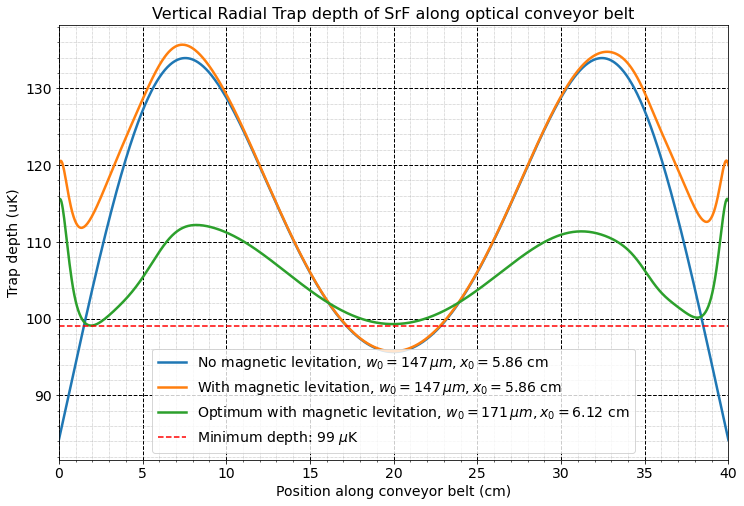

In [1285]:
#recompute the vertical trap depth for SrF accounting for magnetic levitation (assume the horizontal trap depth is unaffected). 

#first, reproduce plot for no magnetic levitation. The optimum parameters are x0 = 6.25 cm, w0 = 150 um.
x01 = 6.25e-2
w01 = 150e-6
x = np.linspace(0,L,1000)
y = 0
z1 = np.linspace(-2*w01,2*w01,1000)
depths = np.empty(len(x))
depths_with_mag = np.empty(len(x))
optimal_depths_with_mag = np.empty(len(x))

x02 = x0mag
w02 = w0mag
z2 = np.linspace(-2*w02,2*w02,1000)

def U_radial_SrF_with_grav_and_mag_no_cos(z,x,x0,w0,lam,P,a_eff_x):
    return U_radial_SrF_without_grav_no_cos(z,x,x0,w0,lam,P) + m_SrF * a_eff_x * z

#no cos because we only consider trapping at the antinodes of the standing wave
#trap depth in uK
for i in range(len(x)):
    depths[i] = (np.max(U_radial_SrF_with_grav_no_cos(z1,x[i],x01,w01,lam,P)[z<0]) - np.min(U_radial_SrF_with_grav_no_cos(z1,x[i],x01,w01,lam,P)))/k*1e6
    depths_with_mag[i] = (np.max(U_radial_SrF_with_grav_and_mag_no_cos(z1,x[i],x01,w01,lam,P,a_eff[i])[z<0]) - np.min(U_radial_SrF_with_grav_and_mag_no_cos(z1,x[i],x01,w01,lam,P,a_eff[i])))/k*1e6
    optimal_depths_with_mag[i] = (np.max(U_radial_SrF_with_grav_and_mag_no_cos(z2,x[i],x02,w02,lam,P,a_eff[i])[z<0]) - np.min(U_radial_SrF_with_grav_and_mag_no_cos(z2,x[i],x02,w02,lam,P,a_eff[i])))/k*1e6

#plot radial and axial trap depths
min_radial_grav = np.min(optimal_depths_with_mag)

plt.figure(figsize=(12, 8))
plt.plot(x*1e2, depths, label=f'No magnetic levitation, $w_0 = {w0*1e6:.0f} \,\mu m, x_0 = {x0*1e2:.2f}$ cm', linewidth=2.5)
plt.plot(x*1e2, depths_with_mag, label=f'With magnetic levitation, $w_0 = {w0*1e6:.0f} \,\mu m, x_0 = {x0*1e2:.2f}$ cm', linewidth=2.5)
plt.plot(x*1e2, optimal_depths_with_mag, label=f'Optimum with magnetic levitation, $w_0 = {w02*1e6:.0f} \,\mu m, x_0 = {x02*1e2:.2f}$ cm', linewidth=2.5)
plt.axhline(y=min_radial_grav, color='red', linestyle='--', label=f'Minimum depth: {round(min_radial_grav)} $\mu$K')
plt.xlabel('Position along conveyor belt (cm)', fontsize=14)
plt.ylabel('Trap depth (uK)', fontsize=14)
plt.title('Vertical Radial Trap depth of SrF along optical conveyor belt', fontsize=16)
#plt.ylim(50, 150)
plt.xlim(0, L*1e2)
plt.legend(fontsize=14)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Optimize for beam waist (w0) and focus (x0) positions INCLUDING magnetic levitation.
## Compute minimum SrF trap depth (among axial and radial) along transport path.

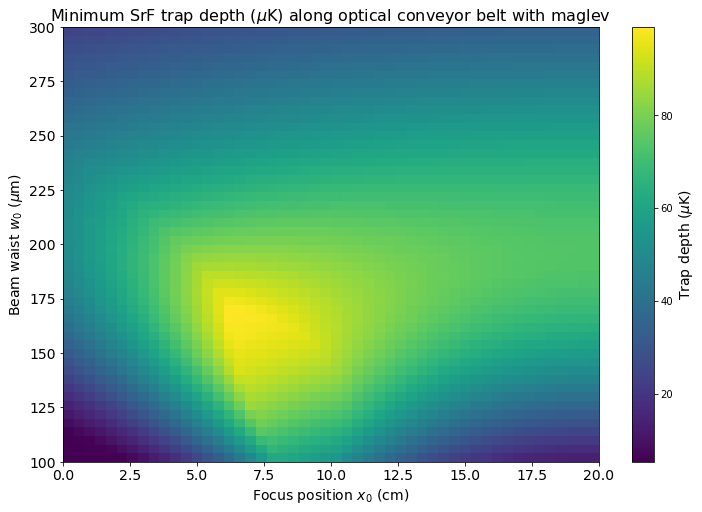

Optimum temperature: 99 µK
Optima coordinates: (w₀ = 169.4 µm, x₀ = 6.12 cm)


In [1286]:
#for a range of beam waists and focus positions, re-compute the minimum trap depth (among radial and axial) - NOW ACCOUNTING FOR MAGNETIC LEVITATION
#along the optical conveyor belt path

x0s = np.linspace(x0min, x0max, num_grid_pts) #in m
w0s = np.linspace(w0min, w0max, num_grid_pts) #in m
overall_mins = np.empty((len(x0s), len(w0s)))

for i in range(len(x0s)):
    for j in range(len(w0s)):
        x = np.linspace(0,L,1000)
        y = 0
        z = np.linspace(-2*w0s[j],2*w0s[j],1000)
        depths_with_maglev = np.empty(len(x))

        #no cos because we only consider trapping at the antinodes of the standing wave
        for index in range(len(x)):
            depths_with_maglev[index] = (np.max(U_radial_SrF_with_grav_and_mag_no_cos(z1,x[index],x0s[i],w0s[j],lam,P,a_eff[index])[z<0]) - np.min(U_radial_SrF_with_grav_and_mag_no_cos(z1,x[index],x0s[i],w0s[j],lam,P,a_eff[index])))/k*1e6

        min_axial = np.min(U_axial_SrF(x,x0s[i],w0s[j],lam,P))
        min_radial = np.min(U_radial_SrF(x,x0s[i],w0s[j],lam,P))
        min_radial_maglev = np.min(depths_with_maglev)
        overall_min = min(min_axial, min_radial, min_radial_maglev)
        overall_mins[i][j] = overall_min
        #print(overall_mins[i][j], i, j, x0s[i], w0s[j])

overall_mins_final = np.transpose(overall_mins) #rows and cols in 2d matrix plot are flipped
plt.figure(figsize=(12, 8))
plt.imshow(overall_mins_final, extent=[x0min*1e2, x0max*1e2, w0min*1e6, w0max*1e6], origin='lower', aspect='auto')
plt.colorbar().set_label('Trap depth ($\mu$K)', fontsize=14)
plt.xlabel('Focus position $x_0$ (cm)', fontsize=14)
plt.ylabel('Beam waist $w_0$ ($\mu$m)', fontsize=14)
plt.title('Minimum SrF trap depth ($\mu$K) along optical conveyor belt with maglev', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

max_value = np.max(overall_mins_final)
max_coords = np.unravel_index(np.argmax(overall_mins_final), overall_mins_final.shape)
optimal_x0 = x0s[max_coords[1]] * 1e2  # Convert to cm
optimal_w0 = w0s[max_coords[0]] * 1e6  # Convert to µm
print(f'Optimum temperature: {max_value:.0f} µK')
print(f'Optima coordinates: (w\u2080 = {optimal_w0:.1f} µm, x\u2080 = {optimal_x0:.2f} cm)')

# Compute axial and radial trap frequencies for SrF in presence of gravity and maglev

Note that because the potential is only quadratic near the bottom and the molecules are mainly sloshing around at the bottom of the potential well, then when we approximate the Gaussian as quadratic, we can ignore the reduced trap depth by gravity and partial compensation by magnetic field gradient.

In other words, radial trap frequency is same for y and z-direction. 

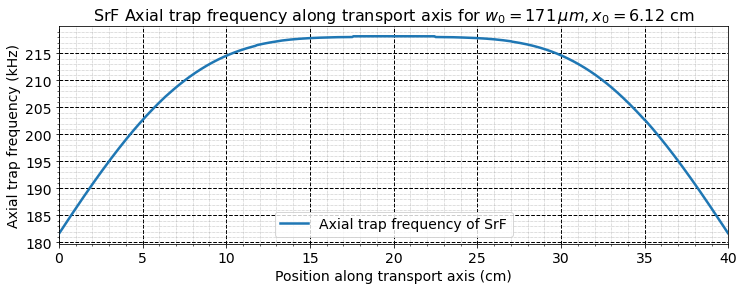

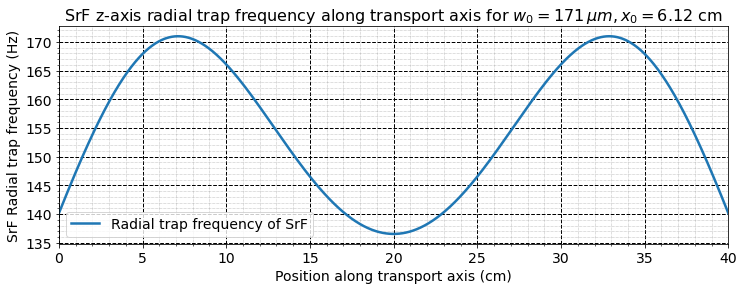

In [1287]:
#now, set the optimum focus position and beam waist to the maglev case. We shall compute the trap frequencies in axial and radial directions.
#for a chosen point on the transport axis, plot the axial trap potential (x), radial (y) trap potential, and radial (z, with grav and maglev) trap potential

#axial first
x = 0.25*lam
y = 0
z = 0

xs = np.arange(x, L, 1e3*lam)
axial_freqs = np.empty(len(xs))

#in hindsight I could probably also do this with no cos since we only care about the antinodes?
def U_axial_potential_SrF(x,x0,y,z,w0,lam,P):
    return -(alpha_SrF/(2*epsilon_0*c))*conveyor_intensity(x,x0,y,z,w0,lam,P)

#fit a parabola to the axial potential
def parabola(x, omega, b, c):
    return 0.5*m_SrF*(omega**2)*(x-b)**2 + c

for i in range(len(xs)):
    x_vals = np.linspace(xs[i]+0.18*lam, xs[i]+0.32*lam, 50)
    popt, pcov = curve_fit(parabola, x_vals, U_axial_potential_SrF(x_vals,x0mag,y,z,w0mag,lam,P), p0=[2*np.pi*100e3, xs[i]+0.25*lam, -2e-27])
    axial_freqs[i] = np.abs(popt[0])/(2*np.pi)/1e3

#plt.plot(x_vals, U_axial_potential_SrF(x_vals,x0mag,y,z,w0mag,lam,P), 'o', label='Axial')
#plt.plot(x_vals, parabola(x_vals, *popt), label='Fit')
#plt.legend()
#plt.show()
#print("Axial trap frequency (f) in kHz:", popt[0]/(2*np.pi)/1e3) 

plt.figure(figsize=(12, 4))
plt.plot(xs*1e2, axial_freqs, label='Axial trap frequency of SrF', linewidth=2.5)
plt.xlim(0, L*1e2)
#plt.ylim(0, 140)
plt.xlabel('Position along transport axis (cm)', fontsize=14)
plt.ylabel('Axial trap frequency (kHz)', fontsize=14)
plt.title(f'SrF Axial trap frequency along transport axis for $w_0 = {w02*1e6:.0f} \, \mu m, x_0 ={x02*1e2:.2f}$ cm', fontsize=16)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#finally, let's compute the case for the radial trap frequency along the z-axis, with magnetic levitation and gravity

xs = np.linspace(0, L, 1000)
y = 0
zradial_freqs = np.empty(len(xs))

def U_zradial_potential_SrF(x,x0,y,z,w0,lam,P, a_eff_x):
    return -(alpha_SrF/(2*epsilon_0*c))*conveyor_intensity_no_cos(x,x0,y,z,w0,lam,P) + m_SrF * a_eff_x * z

"""
#practice plot of potential in z-direction at x = 5.4e-2 m
xtry = 5.4e-2
zs = np.linspace(-0.25*w0mag, 0.25*w0mag, 50)
popt, pcov = curve_fit(parabola, zs, U_zradial_potential_SrF(xtry,x0mag,y,zs,w0mag,lam,P,a_eff[int(xtry/L*1000)]), p0=[2*np.pi*100, 0.001*w0mag, -2e-27])
plt.plot(zs*1e6, U_zradial_potential_SrF(xtry,x0mag,y,zs,w0mag,lam,P,a_eff[int(xtry/L*1000)]), 'o')
plt.plot(zs*1e6, parabola(zs, *popt))
plt.show()

print("z-radial trap frequency (f) in Hz:", popt[0]/(2*np.pi))
"""

for i in range(len(xs)):
    z_vals = np.linspace(-0.25*w0mag, 0.25*w0mag, 50)
    popt, pcov = curve_fit(parabola, z_vals, U_zradial_potential_SrF(xs[i],x0mag,y,z_vals,w0mag,lam,P,a_eff[i]), p0=[2*np.pi*100, 0.001*w0mag, -2e-27])
    zradial_freqs[i] = np.abs(popt[0])/(2*np.pi)

plt.figure(figsize=(12, 4))
plt.plot(xs*1e2, zradial_freqs, label='Radial trap frequency of SrF', linewidth=2.5)
plt.xlim(0, L*1e2)
#plt.ylim(0, 160)
plt.xlabel('Position along transport axis (cm)', fontsize=14)
plt.ylabel('SrF Radial trap frequency (Hz)', fontsize=14)
plt.title(f'SrF z-axis radial trap frequency along transport axis for $w_0 = {w02*1e6:.0f} \, \mu m, x_0 ={x02*1e2:.2f}$ cm', fontsize=16)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#basically the radial frequencies are the same because near the potential minimum, the potential looks the same. 
#The trap depth is only lowered in the z-direction far away from maglev when the z-displacement is comparable to the waist size.

# Optimize only for the axial depth in SrF

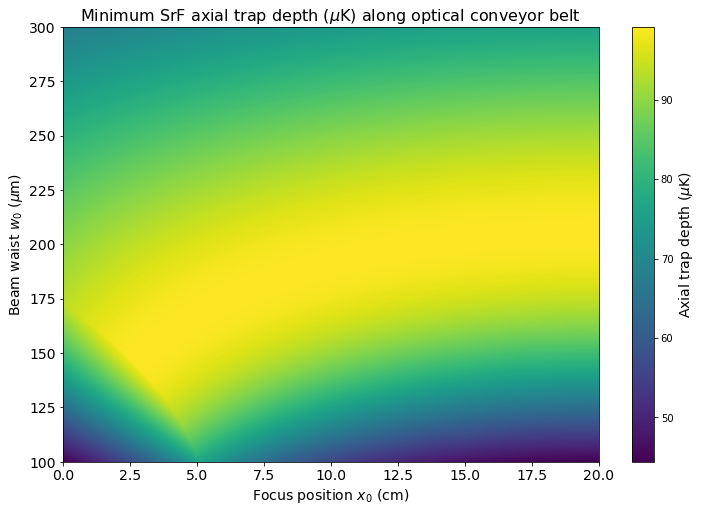

Optimum temperature: 99 µK
Optima coordinates: (w₀ = 164.3 µm, x₀ = 4.60 cm)


In [1288]:
#finally, let's optimize for the axial trap depth only. Maglev shouldn't matter because it only affects z-axis radial trap depth.

#without magnetic levitation for SrF.
#for a range of beam waists and focus positions, compute the minimum axial trap depth along optical conveyor belt path.

x0s = np.linspace(x0min, x0max, num_grid_pts2) #in m
w0s = np.linspace(w0min, w0max, num_grid_pts2) #in m
overall_mins = np.empty((len(x0s), len(w0s)))

for i in range(len(x0s)):
    for j in range(len(w0s)):
        x = np.linspace(0,L,1000)
        y = 0
        z = np.linspace(-2*w0s[j],2*w0s[j],1000)
        min_axial = np.min(U_axial_SrF(x,x0s[i],w0s[j],lam,P))
        overall_mins[i][j] = min_axial
        #print(overall_mins[i][j], i, j, x0s[i], w0s[j])

overall_mins_final = np.transpose(overall_mins) #rows and cols in 2d matrix plot are flipped
plt.figure(figsize=(12, 8))
plt.imshow(overall_mins_final, extent=[x0min*1e2, x0max*1e2, w0min*1e6, w0max*1e6], origin='lower', aspect='auto')
plt.colorbar().set_label('Axial trap depth ($\mu$K)', fontsize=14)
plt.xlabel('Focus position $x_0$ (cm)', fontsize=14)
plt.ylabel('Beam waist $w_0$ ($\mu$m)', fontsize=14)
plt.title('Minimum SrF axial trap depth ($\mu$K) along optical conveyor belt', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

max_value = np.max(overall_mins_final)
max_coords = np.unravel_index(np.argmax(overall_mins_final), overall_mins_final.shape)
optimal_x0 = x0s[max_coords[1]] * 1e2  # Convert to cm
optimal_w0 = w0s[max_coords[0]] * 1e6  # Convert to µm
print(f'Optimum temperature: {max_value:.0f} µK')
print(f'Optima coordinates: (w\u2080 = {optimal_w0:.1f} µm, x\u2080 = {optimal_x0:.2f} cm)')

# Define Velocity Transport Profiles for SrF Molecule Transport

**Up until now, calculations assumed a standing wave lattice.**<br/> 
To use the 1-D optical lattice as a transport mechanism, we need to change the frequency detuning between the beams to create a running wave.

**The velocity of the lattice antinodes is given by v_lattice = lambda * df/2** where df is the frequency difference b/w the two counterpropagating beams.
However, there are 4 immutable boundary conditions that the molecules must follow:

**x(t=0) = 0; x(t=T) = d; v(t=0) = 0; v(t=T) = d** where T and d are the transport duration and length, respectively.

We investigate four different velocity transport profiles designed to satisfy these boundary conditions:<br/>
1. **Minimum Jerk** (3rd time derivative of position)
2. **Minimum Snap** (4th time derivative of position)
3. **Minimum Acceleration** (2nd time derivative of position)
4. **Linear Velocity** (1st time derivative of position)

The first three minimize the square integral of the appropriate time derivative of position over the duration of transport.<br/>
This is easy to obtain closed analytical form (polynomial) by solving Euler-Poisson equation, a generalization of Euler-Lagrange equation.<br/>
It turns out that **for minimum x^(n)(t) trajectory** where n is nth time derivative of position (e.g. **n=2 for acceleration, n=3 for jerk, n=4 for snap**),<br/> **x(t) is (2n-1)th order polynomial in time.** Moreover, there are **2n initial conditions**: the 4 immutable ones above, and any additional ones are set to 0 at beginning and end of transport.

In [1289]:
#here we define the velocity transport profiles used for SrF transport.

def pos_min_jerk(t, d, T):
    return d*(10*(t/T)**3 - 15*(t/T)**4 + 6*(t/T)**5)

def pos_min_snap(t, d, T):
    return d*(35*(t/T)**4 - 84*(t/T)**5 + 70*(t/T)**6 - 20*(t/T)**7)

def pos_min_accel(t, d, T):
    return d*(3*(t/T)**2 - 2*(t/T)**3)

def pos_lin_vel(t, d, T):
    if ((t/T) >= 0 and (t/T) <= 0.5):
        return d*(2*(t/T)**2)
    elif ((t/T) > 0.5 and (t/T)) <= 1:
        return d*(-2*(t/T)**2 + 4*(t/T) - 1)
    else:
        return 0
    
def vel_min_jerk(t, d, T):
    return 30*(d/T)*((t/T)**2 - 2*(t/T)**3 + (t/T)**4)

def vel_min_snap(t, d, T):
    return 140*(d/T)*((t/T)**3 - 3*(t/T)**4 + 3*(t/T)**5 - (t/T)**6)

def vel_min_accel(t, d, T):
    return 6*(d/T)*((t/T) - (t/T)**2)

def vel_lin_vel(t, d, T):
    if (t/T) >= 0 and (t/T) <= 0.5:
        return 4*(d/T)*(t/T)
    elif (t/T) > 0.5 and (t/T) <= 1:
        return 4*(d/T)*(1 - t/T)
    else:
        return 0
    
def acc_min_jerk(t, d, T):
    return 60*(d/T**2)*((t/T) - 3*(t/T)**2 + 2*(t/T)**3)

def acc_min_snap(t, d, T):
    return 420*(d/T**2)*((t/T)**2 - 4*(t/T)**3 + 5*(t/T)**4 - 2*(t/T)**5)

def acc_min_accel(t, d, T):
    return 6*(d/T**2)*(1 - 2*(t/T))

def acc_lin_vel(t, d, T):
    if (t/T) >= 0 and (t/T) <= 0.5:
        return 4*(d/T**2)
    elif (t/T) > 0.5 and (t/T) <= 1:
        return -4*(d/T**2)
    else:
        return 0
    
def jerk_min_jerk(t, d, T):
    return 60*(d/T**3)*(1 - 6*(t/T) + 6*(t/T)**2)

def jerk_min_snap(t, d, T):
    return 840*(d/T**3)*((t/T) - 6*(t/T)**2 + 10*(t/T)**3 - 5*(t/T)**4)

def jerk_min_accel(t, d, T):
    return -12*(d/T**3)

#note that jerk for lin velocity profile is 3 dirac delta functions at t = 0, t = T/2, t = T.

#define distance and time constraints for transport
d = L
T = 15e-3 #in s

# Plot position, velocity, acceleration, and jerk trajectories for these transport profiles

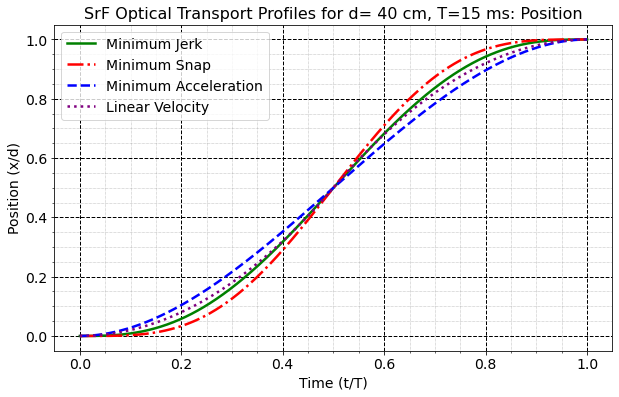

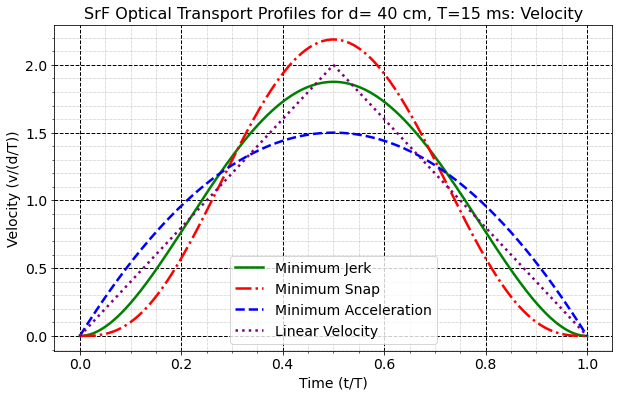

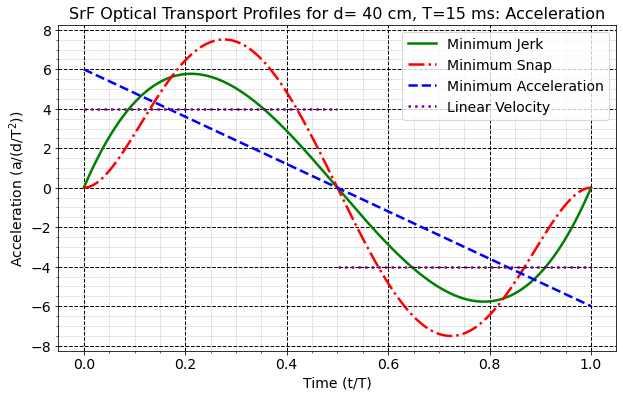

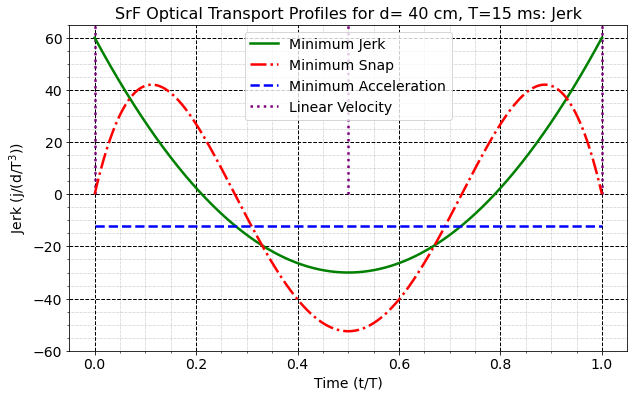

In [1290]:
#first for position
ts = np.linspace(0, T, 1000)


pos_min_jerk_vals = pos_min_jerk(ts, d, T)
pos_min_snap_vals = pos_min_snap(ts, d, T)
pos_min_accel_vals = pos_min_accel(ts, d, T)
pos_lin_vel_vals = np.empty(len(ts))

for i in range(len(ts)):
    pos_lin_vel_vals[i] = pos_lin_vel(ts[i], d, T)

plt.figure(figsize=(10, 6))
plt.plot(ts/T, pos_min_jerk_vals/d, label='Minimum Jerk', linewidth=2.5, linestyle='-', color='green')
plt.plot(ts/T, pos_min_snap_vals/d, label='Minimum Snap', linewidth=2.5, linestyle='-.', color='red')
plt.plot(ts/T, pos_min_accel_vals/d, label='Minimum Acceleration', linewidth=2.5, linestyle='--', color='blue')
plt.plot(ts/T, pos_lin_vel_vals/d, label='Linear Velocity', linewidth=2.5, linestyle=':', color='purple')
plt.xlabel('Time (t/T)', fontsize=14)
plt.ylabel('Position (x/d)', fontsize=14)
plt.title(f'SrF Optical Transport Profiles for d= {d*1e2:.0f} cm, T={T*1e3:.0f} ms: Position', fontsize=16)
plt.legend(fontsize=14)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


#next for velocity

vel_min_jerk_vals = vel_min_jerk(ts, d, T)
vel_min_snap_vals = vel_min_snap(ts, d, T)
vel_min_accel_vals = vel_min_accel(ts, d, T)
vel_lin_vel_vals = np.empty(len(ts))

for i in range(len(ts)):
    vel_lin_vel_vals[i] = vel_lin_vel(ts[i], d, T)

plt.figure(figsize=(10, 6))
plt.plot(ts/T, vel_min_jerk_vals/(d/T), label='Minimum Jerk', linewidth=2.5, linestyle='-', color='green')
plt.plot(ts/T, vel_min_snap_vals/(d/T), label='Minimum Snap', linewidth=2.5, linestyle='-.', color='red')
plt.plot(ts/T, vel_min_accel_vals/(d/T), label='Minimum Acceleration', linewidth=2.5, linestyle='--', color='blue')
plt.plot(ts/T, vel_lin_vel_vals/(d/T), label='Linear Velocity', linewidth=2.5, linestyle=':', color='purple')
plt.xlabel('Time (t/T)', fontsize=14)
plt.ylabel('Velocity (v/(d/T))', fontsize=14)
plt.title(f'SrF Optical Transport Profiles for d= {d*1e2:.0f} cm, T={T*1e3:.0f} ms: Velocity', fontsize=16)
plt.legend(fontsize=14)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#next for acceleration

acc_min_jerk_vals = acc_min_jerk(ts, d, T)
acc_min_snap_vals = acc_min_snap(ts, d, T)
acc_min_accel_vals = acc_min_accel(ts, d, T)
acc_lin_vel_vals = np.empty(len(ts))

for i in range(len(ts)):
    acc_lin_vel_vals[i] = acc_lin_vel(ts[i], d, T)

plt.figure(figsize=(10, 6))
plt.plot(ts/T, acc_min_jerk_vals/(d/T**2), label='Minimum Jerk', linewidth=2.5, linestyle='-', color='green')
plt.plot(ts/T, acc_min_snap_vals/(d/T**2), label='Minimum Snap', linewidth=2.5, linestyle='-.', color='red')
plt.plot(ts/T, acc_min_accel_vals/(d/T**2), label='Minimum Acceleration', linewidth=2.5, linestyle='--', color='blue')
plt.plot(ts[:int(len(ts)/2)]/T, acc_lin_vel_vals[:int(len(ts)/2)]/(d/T**2), label='Linear Velocity', linewidth=2.5, linestyle=':', color='purple')
plt.plot(ts[int(len(ts)/2):]/T, acc_lin_vel_vals[int(len(ts)/2):]/(d/T**2), linewidth=2.5, linestyle=':', color='purple')
plt.xlabel('Time (t/T)', fontsize=14)
plt.ylabel('Acceleration (a/(d/T$^2$))', fontsize=14)
plt.title(f'SrF Optical Transport Profiles for d= {d*1e2:.0f} cm, T={T*1e3:.0f} ms: Acceleration', fontsize=16)
plt.legend(fontsize=14)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


#finally for jerk

jerk_min_jerk_vals = jerk_min_jerk(ts, d, T)
jerk_min_snap_vals = jerk_min_snap(ts, d, T)
jerk_min_accel_vals = np.empty(len(ts))

for i in range(len(ts)):
    jerk_min_accel_vals[i] = jerk_min_accel(ts[i], d, T)

plt.figure(figsize=(10, 6))
plt.plot(ts/T, jerk_min_jerk_vals/(d/T**3), label='Minimum Jerk', linewidth=2.5, linestyle='-', color='green')
plt.plot(ts/T, jerk_min_snap_vals/(d/T**3), label='Minimum Snap', linewidth=2.5, linestyle='-.', color='red')
plt.plot(ts/T, jerk_min_accel_vals/(d/T**3), label='Minimum Acceleration', linewidth=2.5, linestyle='--', color='blue')
plt.vlines(x=0, ymin=0, ymax=np.max(jerk_min_jerk_vals / (d / T**3))+5, color='purple', linewidth=2.5, linestyle=':', label='Linear Velocity')
plt.vlines(x=0.5, ymin=0, ymax=np.max(jerk_min_jerk_vals / (d / T**3))+5, color='purple', linewidth=2.5, linestyle=':')
plt.vlines(x=1, ymin=0, ymax=np.max(jerk_min_jerk_vals / (d / T**3))+5, color='purple', linewidth=2.5, linestyle=':')
plt.xlabel('Time (t/T)', fontsize=14)
plt.ylabel('Jerk (j/(d/T$^3$))', fontsize=14)
plt.ylim(-60, np.max(jerk_min_jerk_vals / (d / T**3))+5)
plt.title(f'SrF Optical Transport Profiles for d= {d*1e2:.0f} cm, T={T*1e3:.0f} ms: Jerk', fontsize=16)
plt.legend(fontsize=14)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Plot axial acceleration from transport as function of position along transport path

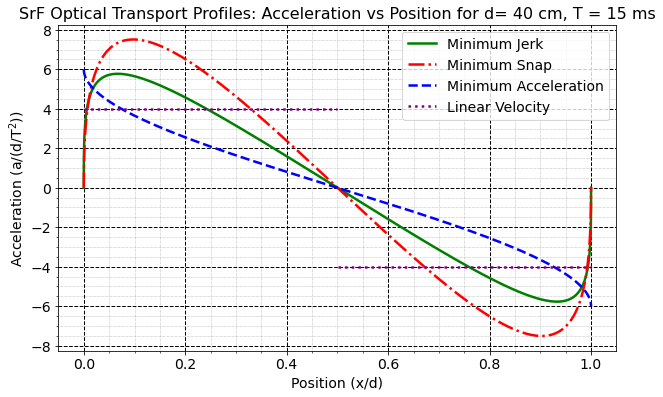

In [1291]:
ts = np.linspace(0, T, 1000)

pos_min_jerk_vals = pos_min_jerk(ts, d, T)
pos_min_snap_vals = pos_min_snap(ts, d, T)
pos_min_accel_vals = pos_min_accel(ts, d, T)
pos_lin_vel_vals = np.empty(len(ts))
for i in range(len(ts)):
    pos_lin_vel_vals[i] = pos_lin_vel(ts[i], d, T)

acc_min_jerk_vals = acc_min_jerk(ts, d, T)
acc_min_snap_vals = acc_min_snap(ts, d, T)
acc_min_accel_vals = acc_min_accel(ts, d, T)
acc_lin_vel_vals = np.empty(len(ts))
for i in range(len(ts)):
    acc_lin_vel_vals[i] = acc_lin_vel(ts[i], d, T)

#obtain acceleration as function of position. This is needed to calculate effect on trap depth as function of position.

plt.figure(figsize=(10, 6))
plt.plot(pos_min_jerk_vals/d, acc_min_jerk_vals/(d/T**2), label='Minimum Jerk', linewidth=2.5, linestyle='-', color='green')
plt.plot(pos_min_snap_vals/d, acc_min_snap_vals/(d/T**2), label='Minimum Snap', linewidth=2.5, linestyle='-.', color='red')
plt.plot(pos_min_accel_vals/d, acc_min_accel_vals/(d/T**2), label='Minimum Acceleration', linewidth=2.5, linestyle='--', color='blue')
plt.plot(pos_lin_vel_vals[:int(len(ts)/2)]/d, acc_lin_vel_vals[:int(len(ts)/2)]/(d/T**2), label='Linear Velocity', linewidth=2.5, linestyle=':', color='purple')
plt.plot(pos_lin_vel_vals[int(len(ts)/2):]/d, acc_lin_vel_vals[int(len(ts)/2):]/(d/T**2), linewidth=2.5, linestyle=':', color='purple')
plt.xlabel('Position (x/d)', fontsize=14)
plt.ylabel('Acceleration (a/(d/T$^2$))', fontsize=14)
plt.title(f'SrF Optical Transport Profiles: Acceleration vs Position for d= {d*1e2:.0f} cm, T = {T*1e3:.0f} ms', fontsize=16)
plt.legend(fontsize=14)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Compute SrF Axial Trap Tilt From Velocity Transport Profiles

**Acceleration of lattice tilts the axial trapping potential** just like how gravity does for the vertical potential.<br/>
As we saw when computing d|B|/dx, the **axial trap extent is lambda/2 = 532 nm, i.e. almost 1000x smaller than radial trap extent.**<br/>
For d|B|/dx, this means it needs to be roughly 1000x larger than d|B|/dz to have sizeable effect on tilting axial trap depth, which it's not.

On the other hand, **if the acceleration from velocity transport profile is 1000x larger than g, then there will be axial trap tilting** comparable to the radial trap tilt from gravity. This actually turns out to be the case here since d = 37.2 cm and T~10s of ms.

## How Axial Tilt Occurs by Acceleration during Optical Transport

First, we show that we can, to good approximation, take the lowering in trap depth at position x to be m*a(x)*lam/4, where lam/4 signifies the distance from trough to peak of the axial trap. This holds because **we assume a(x) does not change substantially over the extent of the axial trap (lam/2)**, and because the **axial traps are purely sinusoidal, not Gaussian** like the radial traps (meaning the lowered peak roughly coincides with the original peak location in x).

Note for these calculations that we will **subtract off the "global" offset that is present because of nonzero axial intensity unless in the far field** from the focus.

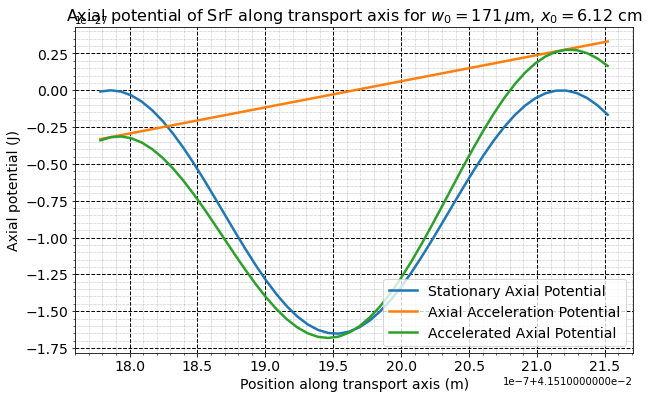

In [1292]:
#define functions for subtracting off the energy offset due to constant nonzero intensity in the axial direction.

#this is the nonzero (negative) offset in axial intensity due to nonzero intensity unless you're very far from the waist axially.
def axial_intensity_offset(x,x0,w0,lam,P):
    I1 = gaussian_beam_intensity(x,x0,0,0,w0,lam,P)
    I2 = gaussian_beam_intensity(x,L-x0,0,0,w0,lam,P)
    total = I1 + I2 - 2 * np.sqrt(I1 * I2)
    return total

#this is the corresponding nonzero (negative) offset in axial potential due to nonzero axial intensity.
def U_axial_potential_SrF_offset(x,x0,w0,lam,P):
    return -(alpha_SrF/(2*epsilon_0*c))*axial_intensity_offset(x,x0,w0,lam,P)

#demonstrate what axial trap tilting looks like due to acceleration during transport
y=0
z=0
dx = 0.25*lam
test = 250
xs = np.linspace(pos_min_jerk_vals[test]-0.7*dx, pos_min_jerk_vals[test]+1.55*dx, 50)
delta_xs = xs - np.median(xs)
potential = U_axial_potential_SrF(xs,x0mag,y,z,w0mag,lam,P) - U_axial_potential_SrF_offset(xs,x0mag,w0mag,lam,P)
axial_accel_potential = m_SrF*acc_min_jerk_vals[test]*delta_xs
mod_potential = potential + axial_accel_potential

plt.figure(figsize=(10, 6))
plt.plot(xs, potential, label='Stationary Axial Potential', linewidth=2.5)
plt.plot(xs, axial_accel_potential, label='Axial Acceleration Potential', linewidth=2.5)
plt.plot(xs, mod_potential, label='Accelerated Axial Potential', linewidth=2.5)
plt.xlabel('Position along transport axis (m)', fontsize=14)
plt.ylabel('Axial potential (J)', fontsize=14)
plt.title(f'Axial potential of SrF along transport axis for $w_0 = {w0mag*1e6:.0f}\, \mu$m, $x_0 = {x0mag*1e2:.2f}$ cm', fontsize=16)
plt.legend(fontsize=14)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Example SrF axial trap depth at v_avg = 25 m/s for different transport profiles 

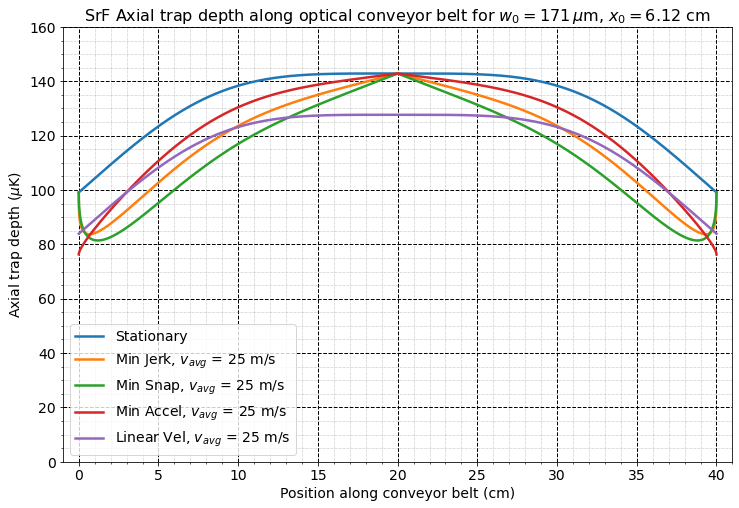

In [1293]:
#plot how axial trap depth is affected at this speed (d=40 cm, T=15 ms -> v_avg=26.7 m/s) for all 4 transport profiles.

#work with optimal focus position and beam waist in the presence of maglev for SrF.
xs = np.linspace(0, d, 1000)

#trap depth due to axial acceleration
def U_axial_SrF_accel(x,x0,w0,lam,P,a_eff_x):
    #note here absolute value is used because if acceleration switches sign, it just switches whether the potential tilts left or right. The reduced trap depth is the same.
    return U_axial_SrF(x,x0,w0,lam,P) - m_SrF*np.abs(a_eff_x)*lam/4/k*1e6

plt.figure(figsize=(12, 8))
plt.plot(xs*1e2,U_axial_SrF(xs,x0mag,w0mag,lam,P), label='Stationary', linewidth=2.5)
plt.plot(pos_min_jerk_vals*1e2,U_axial_SrF_accel(pos_min_jerk_vals,x0mag,w0mag,lam,P,acc_min_jerk_vals), label='Min Jerk, $v_{avg}$ = 25 m/s', linewidth=2.5)
plt.plot(pos_min_snap_vals*1e2,U_axial_SrF_accel(pos_min_snap_vals,x0mag,w0mag,lam,P,acc_min_snap_vals), label='Min Snap, $v_{avg}$ = 25 m/s', linewidth=2.5)
plt.plot(pos_min_accel_vals*1e2,U_axial_SrF_accel(pos_min_accel_vals,x0mag,w0mag,lam,P,acc_min_accel_vals), label='Min Accel, $v_{avg}$ = 25 m/s', linewidth=2.5)
plt.plot(pos_lin_vel_vals*1e2,U_axial_SrF_accel(pos_lin_vel_vals,x0mag,w0mag,lam,P,acc_lin_vel_vals), label='Linear Vel, $v_{avg}$ = 25 m/s', linewidth=2.5)
plt.xlabel('Position along conveyor belt (cm)', fontsize=14)
plt.ylabel('Axial trap depth ($\mu$K)', fontsize=14)
plt.title(f'SrF Axial trap depth along optical conveyor belt for $w_0 = {w0mag*1e6:.0f}\, \mu$m, $x_0 = {x0mag*1e2:.2f}$ cm', fontsize=16)
plt.xlim(-1, d*1e2+1)
plt.ylim(0, 160)
plt.legend(fontsize=14)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


## Finally, compute drop in SrF axial trap depth for various v_avg for different transport profiles

Here, let's compute drop in SrF axial trap depth due to axial trap tilt from different transport profiles.

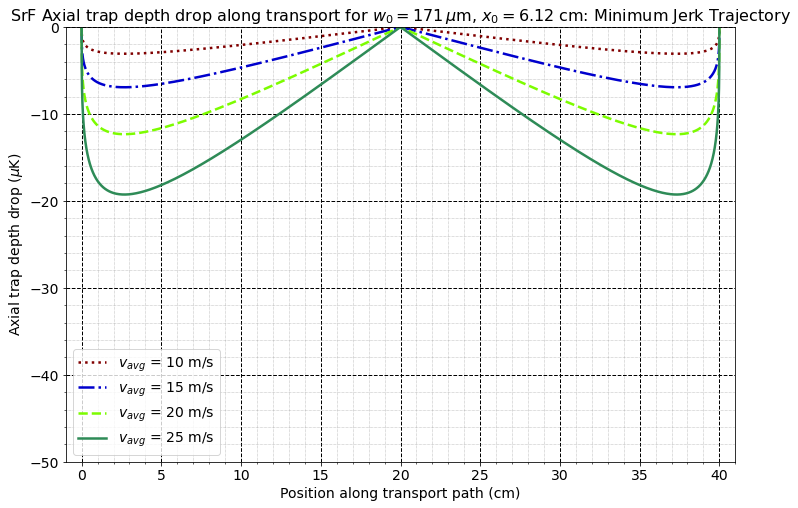

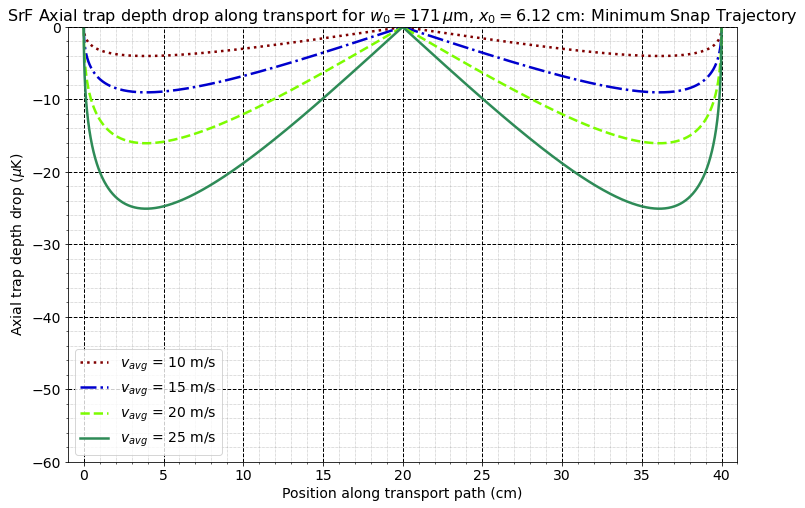

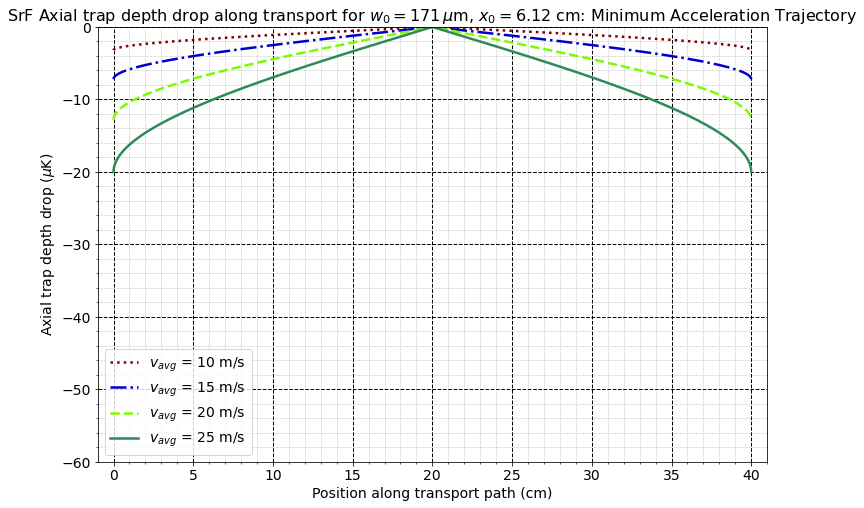

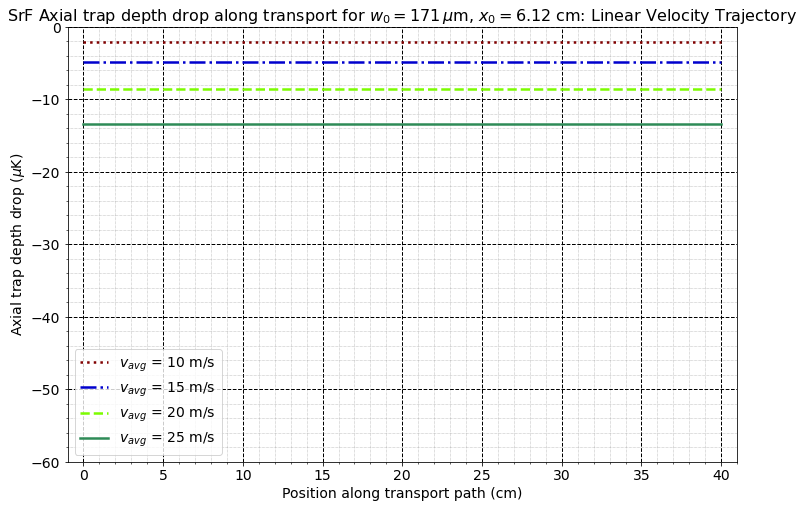

In [1294]:
vavgs = np.array([10, 15, 20, 25]) #avg velocities to consider in m/s. v_avg = d/T.as_integer_ratio
Ts = d/vavgs

all_pos_min_jerk_vals = np.empty((len(vavgs), 1000))
all_pos_min_snap_vals = np.empty((len(vavgs), 1000))
all_pos_min_accel_vals = np.empty((len(vavgs), 1000))
all_pos_lin_vel_vals = np.empty((len(vavgs), 1000))

all_acc_min_jerk_vals = np.empty((len(vavgs), 1000))
all_acc_min_snap_vals = np.empty((len(vavgs), 1000))
all_acc_min_accel_vals = np.empty((len(vavgs), 1000))
all_acc_lin_vel_vals = np.empty((len(vavgs), 1000))

axial_drop_min_jerk = np.empty((len(vavgs), 1000))
axial_drop_min_snap = np.empty((len(vavgs), 1000))
axial_drop_min_accel = np.empty((len(vavgs), 1000))
axial_drop_lin_vel = np.empty((len(vavgs), 1000))

#first for minimum jerk trajectory
plt.figure(figsize=(12, 8))
linestyles = [':', '-.', '--', '-']
colors = ['maroon', 'mediumblue', 'lawngreen', 'seagreen']
for i in range(len(vavgs)):
    ts = np.linspace(0, Ts[i], 1000)
    all_pos_min_jerk_vals[i] = pos_min_jerk(ts, d, Ts[i])
    all_acc_min_jerk_vals[i] = acc_min_jerk(ts, d, Ts[i])

    axial_drop_min_jerk[i] = U_axial_SrF_accel(all_pos_min_jerk_vals[i],x0mag,w0mag,lam,P,all_acc_min_jerk_vals[i]) - U_axial_SrF(all_pos_min_jerk_vals[i],x0mag,w0mag,lam,P)
    plt.plot(all_pos_min_jerk_vals[i]*1e2,axial_drop_min_jerk[i], label=f'$v_{{avg}}$ = {vavgs[i]} m/s', linewidth=2.5, linestyle=linestyles[i], color=colors[i])

plt.xlabel('Position along transport path (cm)', fontsize=14)
plt.ylabel('Axial trap depth drop ($\mu$K)', fontsize=14)
plt.title(f'SrF Axial trap depth drop along transport for $w_0 = {w0mag*1e6:.0f} \,\mu$m, $x_0 = {x0mag*1e2:.2f}$ cm: Minimum Jerk Trajectory', fontsize=16)
plt.xlim(-1, d*1e2+1)
plt.ylim(-50, 0)
plt.legend(fontsize=14)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#next for minimum snap trajectory

plt.figure(figsize=(12, 8))
for i in range(len(vavgs)):
    ts = np.linspace(0, Ts[i], 1000)
    all_pos_min_snap_vals[i] = pos_min_snap(ts, d, Ts[i])
    all_acc_min_snap_vals[i] = acc_min_snap(ts, d, Ts[i])

    axial_drop_min_snap[i] = U_axial_SrF_accel(all_pos_min_snap_vals[i],x0mag,w0mag,lam,P,all_acc_min_snap_vals[i]) - U_axial_SrF(all_pos_min_snap_vals[i],x0mag,w0mag,lam,P)
    plt.plot(all_pos_min_snap_vals[i]*1e2,axial_drop_min_snap[i], label=f'$v_{{avg}}$ = {vavgs[i]} m/s', linewidth=2.5, linestyle=linestyles[i], color=colors[i])

plt.xlabel('Position along transport path (cm)', fontsize=14)
plt.ylabel('Axial trap depth drop ($\mu$K)', fontsize=14)
plt.title(f'SrF Axial trap depth drop along transport for $w_0 = {w0mag*1e6:.0f} \,\mu$m, $x_0 = {x0mag*1e2:.2f}$ cm: Minimum Snap Trajectory', fontsize=16)
plt.xlim(-1, d*1e2+1)
plt.ylim(-60, 0)
plt.legend(fontsize=14)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


#next for minimum acceleration trajectory

plt.figure(figsize=(12, 8))
for i in range(len(vavgs)):
    ts = np.linspace(0, Ts[i], 1000)
    all_pos_min_accel_vals[i] = pos_min_accel(ts, d, Ts[i])
    all_acc_min_accel_vals[i] = acc_min_accel(ts, d, Ts[i])

    axial_drop_min_accel[i] = U_axial_SrF_accel(all_pos_min_accel_vals[i],x0mag,w0mag,lam,P,all_acc_min_accel_vals[i]) - U_axial_SrF(all_pos_min_accel_vals[i],x0mag,w0mag,lam,P)
    plt.plot(all_pos_min_accel_vals[i]*1e2,axial_drop_min_accel[i], label=f'$v_{{avg}}$ = {vavgs[i]} m/s', linewidth=2.5, linestyle=linestyles[i], color=colors[i])

plt.xlabel('Position along transport path (cm)', fontsize=14)
plt.ylabel('Axial trap depth drop ($\mu$K)', fontsize=14)
plt.title(f'SrF Axial trap depth drop along transport for $w_0 = {w0mag*1e6:.0f} \,\mu$m, $x_0 = {x0mag*1e2:.2f}$ cm: Minimum Acceleration Trajectory', fontsize=16)
plt.xlim(-1, d*1e2+1)
plt.ylim(-60, 0)
plt.legend(fontsize=14)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


#finally for linear velocity trajectory

plt.figure(figsize=(12, 8))
for i in range(len(vavgs)):
    ts = np.linspace(0, Ts[i], 1000)
    for j in range(len(ts)):
        all_pos_lin_vel_vals[i][j] = pos_lin_vel(ts[j], d, Ts[i])
        all_acc_lin_vel_vals[i][j] = acc_lin_vel(ts[j], d, Ts[i])

    axial_drop_lin_vel[i] = U_axial_SrF_accel(all_pos_lin_vel_vals[i],x0mag,w0mag,lam,P,all_acc_lin_vel_vals[i]) - U_axial_SrF(all_pos_lin_vel_vals[i],x0mag,w0mag,lam,P)
    plt.plot(all_pos_lin_vel_vals[i]*1e2,axial_drop_lin_vel[i], label=f'$v_{{avg}}$ = {vavgs[i]} m/s', linewidth=2.5, linestyle=linestyles[i], color=colors[i])

plt.xlabel('Position along transport path (cm)', fontsize=14)
plt.ylabel('Axial trap depth drop ($\mu$K)', fontsize=14)
plt.title(f'SrF Axial trap depth drop along transport for $w_0 = {w0mag*1e6:.0f}\, \mu$m, $x_0 = {x0mag*1e2:.2f}$ cm: Linear Velocity Trajectory', fontsize=16)
plt.xlim(-1, d*1e2+1)
plt.ylim(-60, 0)
plt.legend(fontsize=14)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Compute drop in SrF axial trap depth as function of average speed during transport

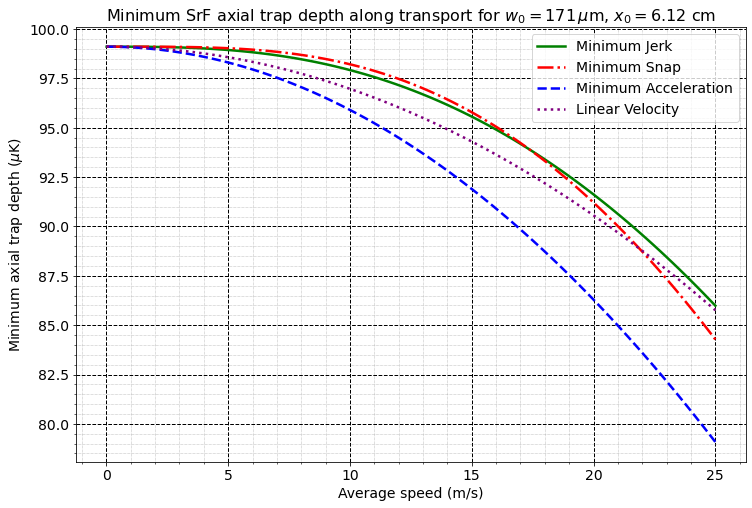

In [1295]:
vavgs2 = np.linspace(0.01, 25, 100) #avg velocities to consider in m/s. v_avg = d/T.as_integer_ratio
Ts2 = d/vavgs2

min_axial_depths_min_jerk = np.empty(len(vavgs2))
min_axial_depths_min_snap = np.empty(len(vavgs2))
min_axial_depths_min_accel = np.empty(len(vavgs2))
min_axial_depths_lin_vel = np.empty(len(vavgs2))

for i in range(len(vavgs2)):
    ts = np.linspace(0, Ts2[i], 1000)
    pos_min_jerk_vals2 = pos_min_jerk(ts, d, Ts2[i])
    acc_min_jerk_vals2 = acc_min_jerk(ts, d, Ts2[i])
    min_axial_depths_min_jerk[i] = np.min(U_axial_SrF_accel(pos_min_jerk_vals2,x0mag,w0mag,lam,P,acc_min_jerk_vals2))

    pos_min_snap_vals2 = pos_min_snap(ts, d, Ts2[i])
    acc_min_snap_vals2 = acc_min_snap(ts, d, Ts2[i])
    min_axial_depths_min_snap[i] = np.min(U_axial_SrF_accel(pos_min_snap_vals2,x0mag,w0mag,lam,P,acc_min_snap_vals2))

    pos_min_accel_vals2 = pos_min_accel(ts, d, Ts2[i])
    acc_min_accel_vals2 = acc_min_accel(ts, d, Ts2[i])
    min_axial_depths_min_accel[i] = np.min(U_axial_SrF_accel(pos_min_accel_vals2,x0mag,w0mag,lam,P,acc_min_accel_vals2))

    pos_lin_vel_vals2 = np.empty(len(ts))
    acc_lin_vel_vals2 = np.empty(len(ts))
    for j in range(len(ts)):
        pos_lin_vel_vals2[j] = pos_lin_vel(ts[j], d, Ts2[i])
        acc_lin_vel_vals2[j] = acc_lin_vel(ts[j], d, Ts2[i])
    min_axial_depths_lin_vel[i] = np.min(U_axial_SrF_accel(pos_lin_vel_vals2,x0mag,w0mag,lam,P,acc_lin_vel_vals2))

plt.figure(figsize=(12, 8))
plt.plot(vavgs2,min_axial_depths_min_jerk, label='Minimum Jerk', linewidth=2.5, linestyle='-', color='green')
plt.plot(vavgs2,min_axial_depths_min_snap, label='Minimum Snap', linewidth=2.5, linestyle='-.', color='red')
plt.plot(vavgs2,min_axial_depths_min_accel, label='Minimum Acceleration', linewidth=2.5, linestyle='--', color='blue')
plt.plot(vavgs2,min_axial_depths_lin_vel, label='Linear Velocity', linewidth=2.5, linestyle=':', color='purple')
plt.xlabel('Average speed (m/s)', fontsize=14)
plt.ylabel('Minimum axial trap depth ($\mu$K)', fontsize=14)
plt.title(f'Minimum SrF axial trap depth along transport for $w_0 = {w0mag*1e6:.0f}\, \mu$m, $x_0 = {x0mag*1e2:.2f}$ cm', fontsize=16)
plt.legend(fontsize=14)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Compute drop in SrF axial trap depth as function of max acceleration attained during optical transport

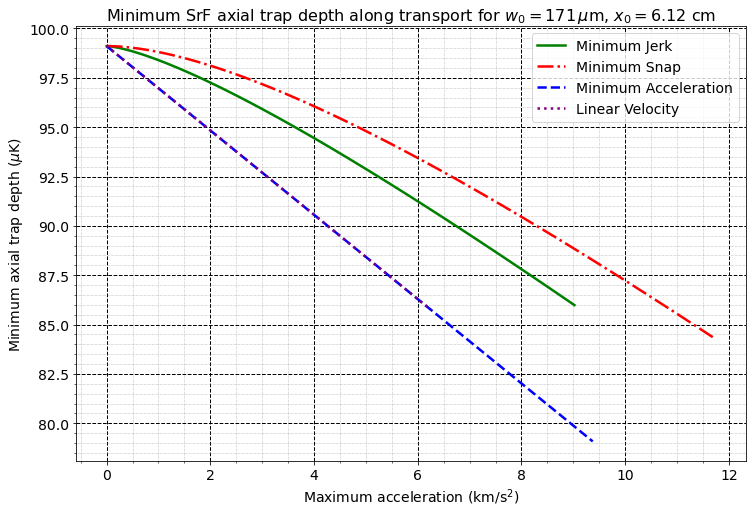

In [1296]:
vavgs2 = np.linspace(0.01, 25, 100) #avg velocities to consider in m/s. v_avg = d/T.as_integer_ratio
Ts2 = d/vavgs2
Bs = np.array([10/np.sqrt(3), 84/(5*np.sqrt(5)), 6, 4])
amaxs = np.empty((len(Bs), len(vavgs2)))

for i in range(len(Bs)):
    amaxs[i] = Bs[i]*d/Ts2**2

plt.figure(figsize=(12, 8))
plt.plot(amaxs[0]/1e3, min_axial_depths_min_jerk, label='Minimum Jerk', linewidth=2.5, linestyle='-', color='green')
plt.plot(amaxs[1]/1e3, min_axial_depths_min_snap, label='Minimum Snap', linewidth=2.5, linestyle='-.', color='red')
plt.plot(amaxs[2]/1e3, min_axial_depths_min_accel, label='Minimum Acceleration', linewidth=2.5, linestyle='--', color='blue')
plt.plot(amaxs[3]/1e3, min_axial_depths_lin_vel, label='Linear Velocity', linewidth=2.5, linestyle=':', color='purple')
plt.xlabel('Maximum acceleration (km/s$^2$)', fontsize=14)
plt.ylabel('Minimum axial trap depth ($\mu$K)', fontsize=14)
plt.title(f'Minimum SrF axial trap depth along transport for $w_0 = {w0mag*1e6:.0f}\, \mu$m, $x_0 = {x0mag*1e2:.2f}$ cm', fontsize=16)
plt.legend(fontsize=14)
plt.grid(linestyle = '--', which = 'major', linewidth = 1, color='black')
plt.grid(linestyle = ':', which = 'minor', linewidth = 0.5, color = 'gray')
plt.minorticks_on()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()